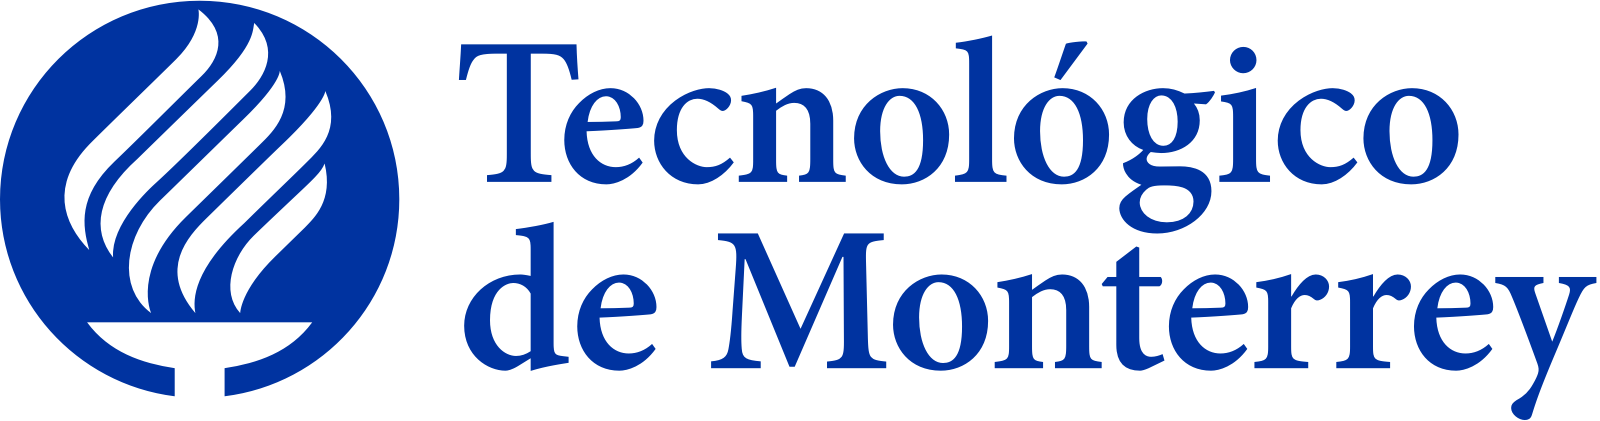

**Materia: Proyecto Integrador** <br>
Profesores titulares: <br>
Dra. Grettel Barceló Alonso <br>
Dr. Luis Eduardo Falcón Morales
                      
Nombre: Francisco Javier Hernandez Camarillo <br>
Matricula: a00998083

***Avance 4. Modelos alternativos*** <br>
Equipo. 24

# Avance 1


Introducción
El Análisis Exploratorio de Datos (EDA) es un paso crucial en cualquier proyecto de ciencia de datos, proporcionando una comprensión profunda de la naturaleza y las características de los datos. Sin embargo, cuando se trata de un conjunto de datos compuesto exclusivamente por imágenes, el enfoque tradicional del EDA, generalmente aplicado a datos tabulares, se tuvo que adapatar para nuestro proyecto. 

EDA para Imágenes
En nuestro caso, el conjunto de datos consta únicamente de imágenes. A diferencia de los datos tabulares. Por lo tanto, en lugar de centrarnos en estadísticas descriptivas y correlaciones, que son típicas en el EDA tradicional, hemos aplicado técnicas de procesamiento y análisis de imágenes.

In [ ]:
##!pip install scikit-learn

In [ ]:
##!pip install labelme

In [ ]:
##!pip install ultralytics

In [ ]:
##!pip install labelme2yolo

In [ ]:
##!pip install torch torchvision torchaudio

In [2]:
import torch

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans

Lectura de datos.  <br>
Se empezo por localizar las imagenes y obtener las rutas de acceso a ellas que se guardaron en una lista.

In [6]:
# Ruta del directorio donde están tus imágenes
image_directory = r'C:\Users\javier\Documents\proyectoFinal\imagenesConectores'

# Lista para almacenar los nombres de las imágenes
image_names = []

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(image_directory):
    if filename.lower().endswith(('.png')):  
        image_names.append(filename)

# Ahora image_names contiene los nombres de todas las imágenes
print("Total de imágenes:", len(image_names))

Total de imágenes: 107


Se grafico el tamano de cada imagen

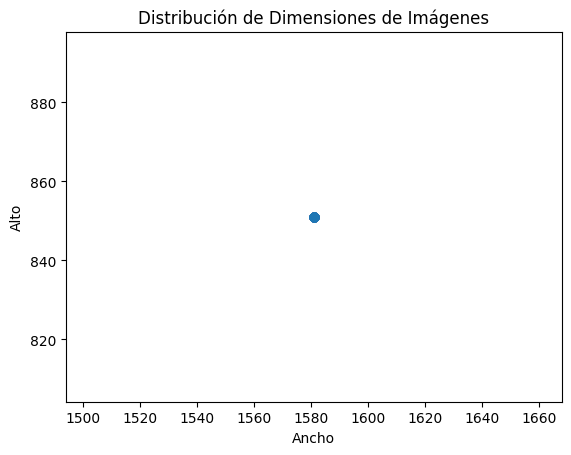

In [7]:
# Leer imágenes
image_sizes = []
for filename in os.listdir(image_directory):
    if filename.endswith('.png'):  # Asegúrate de cambiar la extensión si es necesario
        filepath = os.path.join(image_directory, filename)
        with Image.open(filepath) as img:
            image_sizes.append(img.size)

# Visualización de tamaños de imágenes
widths, heights = zip(*image_sizes)
plt.scatter(widths, heights)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.title('Distribución de Dimensiones de Imágenes')
plt.show()

In [8]:
print(widths, heights)

(1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581, 1581) (851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 851, 8

Ploteamos 5 ejemplos de las 110 imagenes

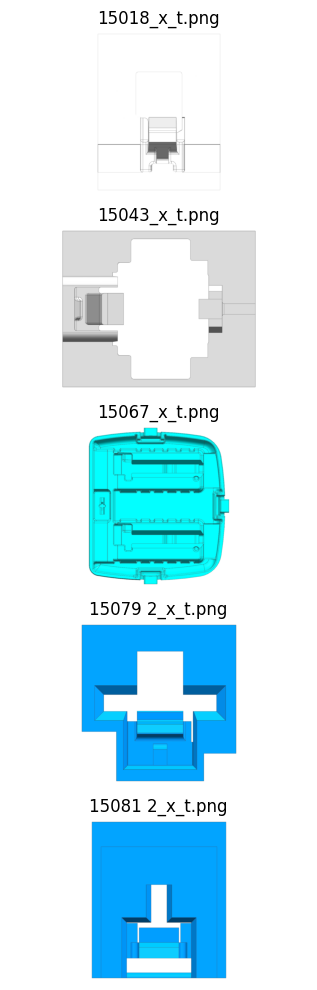

In [23]:
# Obtener los nombres de los archivos de las primeras cinco imágenes
image_files = image_names[:5]

# Configurar el entorno de matplotlib para mostrar las imágenes
fig, axes = plt.subplots(5, 1, figsize=(10, 10))  # Ajusta el tamaño según sea necesario
axes = axes.flatten()

# Cargar y mostrar cada imagen
for ax, image_file in zip(axes, image_files):
    image_path = os.path.join(image_directory, image_file)
    image = Image.open(image_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(image_file)

plt.tight_layout()
plt.show()

**Análisis de Color y Textura:** <br> Dado que las imágenes son principalmente visuales, se analizaron aspectos como la distribución del color y las texturas. Estas características son esenciales para entender patrones visuales que no pueden ser capturados a través de métodos estadísticos convencionales.

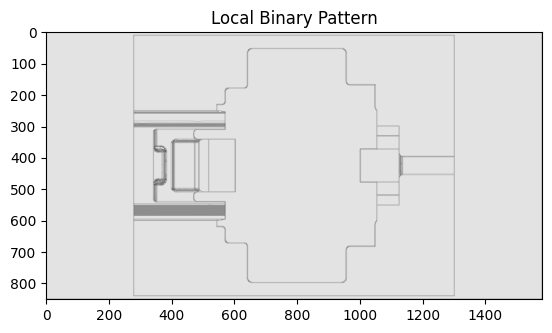

In [24]:
# Función para calcular y mostrar LBP
def show_lbp(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    plt.imshow(lbp, cmap='gray')
    plt.title('Local Binary Pattern')
    plt.show()

# Ejemplo de uso
image_path = os.path.join(image_directory, image_names[1])
show_lbp(image_path)

**Uso de la Detección de Bordes de Canny:** <br> Implementamos la detección de bordes de Canny para resaltar y analizar los contornos y bordes dentro de las imágenes. Esta técnica es particularmente útil para comprender la estructura y forma en las imágenes, lo que puede ser crucial para ciertas aplicaciones como el reconocimiento de objetos o la segmentación.

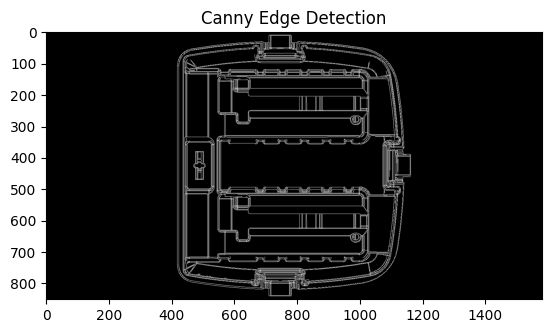

In [25]:
def show_edges(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.show()

# Ejemplo de uso
image_path = os.path.join(image_directory, image_names[2])
show_edges(image_path)

**Segmentación de Imágenes:** <br> Aplicamos técnicas de segmentación, como K-means, para dividir las imágenes en diferentes regiones basadas en características similares. Esto ayuda a entender cómo se componen las imágenes y a identificar patrones o anomalías específicos de ciertas regiones.

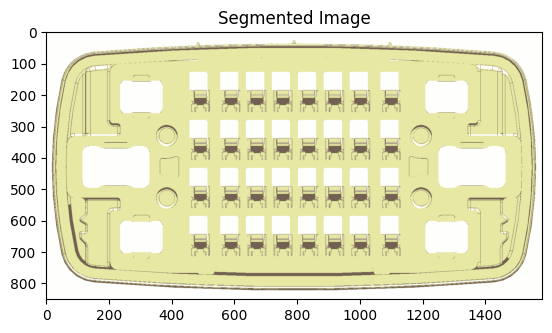

In [26]:
def segment_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    plt.imshow(segmented_image)
    plt.title('Segmented Image')
    plt.show()

# Ejemplo de uso
image_path = os.path.join(image_directory, image_names[9])
segment_image(image_path)


**Normalización:** <br> Las imágenes se normalizaron para llevar todos los valores de píxeles al mismo rango (0-1). Esto es fundamental para preparar las imágenes para procesos de análisis y modelado posteriores, ya que ayuda a reducir las discrepancias en la escala y mejora la eficiencia del entrenamiento de modelos de aprendizaje automático.

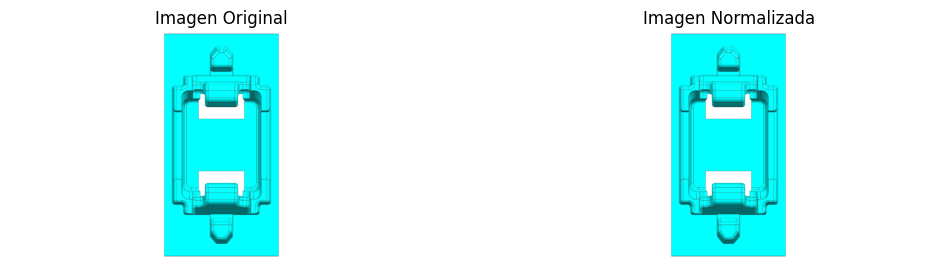

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1

In [27]:
def load_and_normalize_image(image_path):
    # Cargar imagen
    image = Image.open(image_path)
    image_array = np.array(image)

    # Normalizar la imagen
    normalized_image_array = image_array / 255.0

    return image_array, normalized_image_array

# Ruta a tu imagen
image_path = os.path.join(image_directory, image_names[11])

# Cargar y normalizar la imagen
original, normalized = load_and_normalize_image(image_path)

# Mostrar ambas imágenes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(normalized)
axes[1].set_title('Imagen Normalizada')
axes[1].axis('off')

plt.show()
print(original)
print(normalized)

Conclusión
Nuestro EDA para este conjunto de datos de imágenes implicó adaptar y aplicar técnicas específicas para el análisis visual. Al hacerlo, pudimos obtener insights valiosos que van más allá de lo que los métodos tradicionales podrían revelar, preparándonos así para pasos más avanzados en nuestro proyecto, como el modelado y la clasificación.

# Avance #2

etiquetado de las imagenes <br>
LabelMe es una aplicación de anotación de imágenes para Python que permite la anotación de imágenes con etiquetas de objetos. 

empezamos abriendo label me desde una consola de powershell.
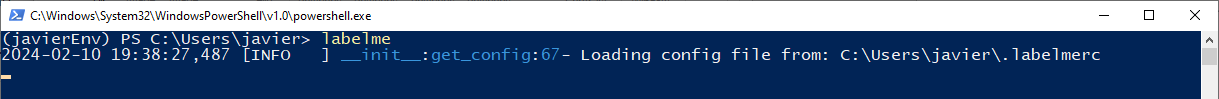

Abajo se muestra el proceso de etiquetado en labelme. Se etiquetaron 107 imagenes

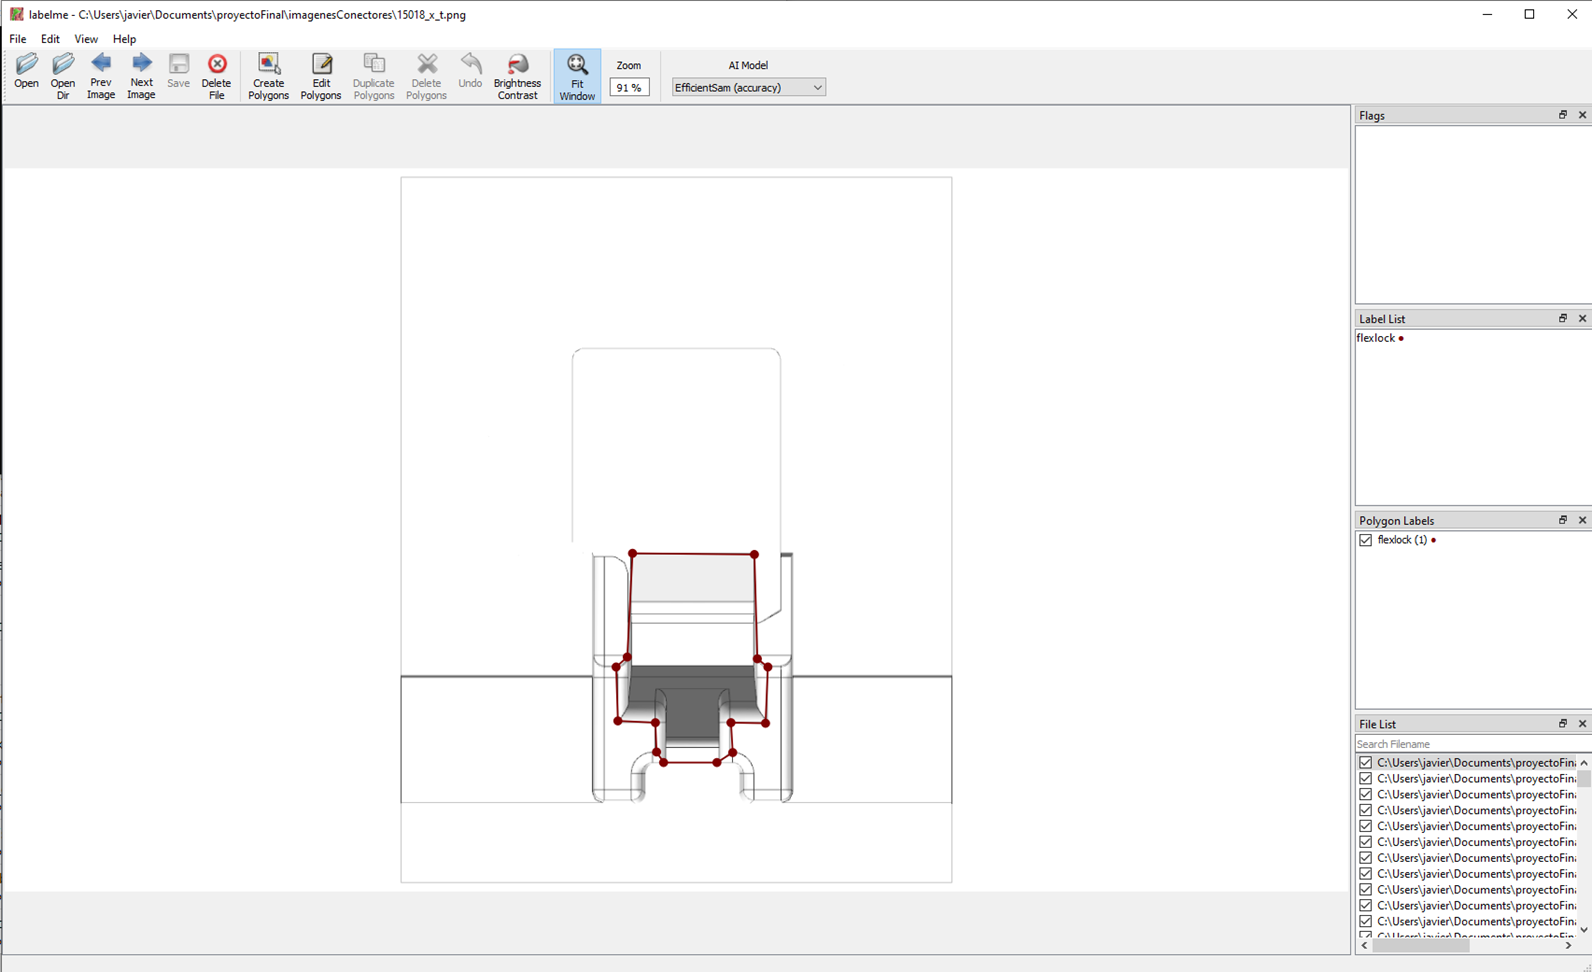

LabelMe no guarda las anotaciones en el formato específico de YOLO por defecto, guardamos las antoaciones en formato .json. Podemos revisar el resultado del etiquetado con el sigiente comando en consola

`labelme_draw_json  C:/Users/javier/Documents/proyectoFinal/imagenesConectores/15117_x_t.json`

abajo se muestran algunas capturas que se obtuvieron con este codigo.


In [20]:
from PIL import Image

image_directory_2 = r"C:\Users\javier\Documents\proyectoFinal\imagenesparajupyter/"

# Rutas a las imágenes
imagen1_path = os.path.join(image_directory_2,'Picture1.png')
imagen2_path = os.path.join(image_directory_2,'Picture2.png')
imagen3_path = os.path.join(image_directory_2,'Picture3.png')
imagen4_path = os.path.join(image_directory_2,'Picture4.png')

# Carga las imágenes
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)
imagen3 = Image.open(imagen3_path)
imagen4 = Image.open(imagen4_path)

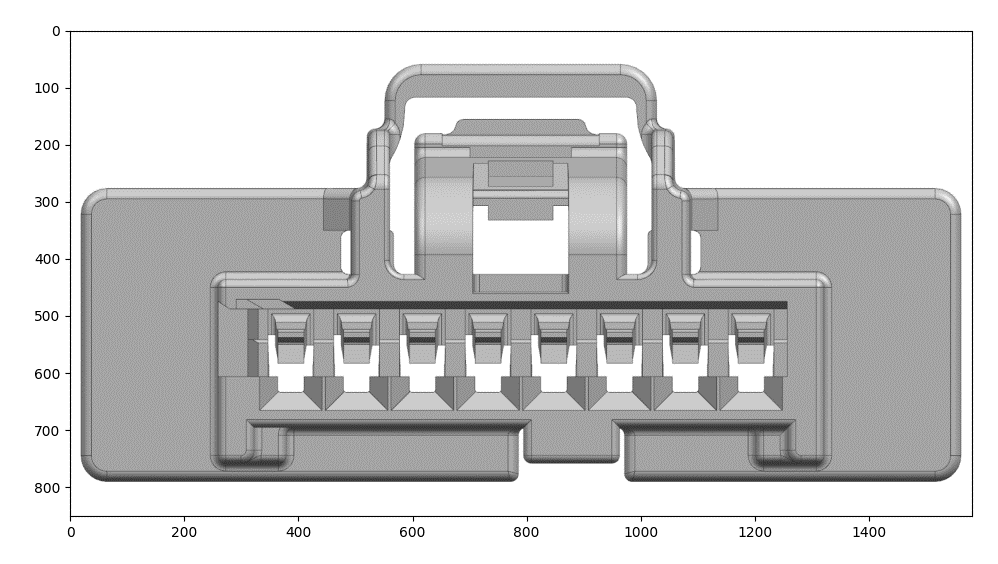

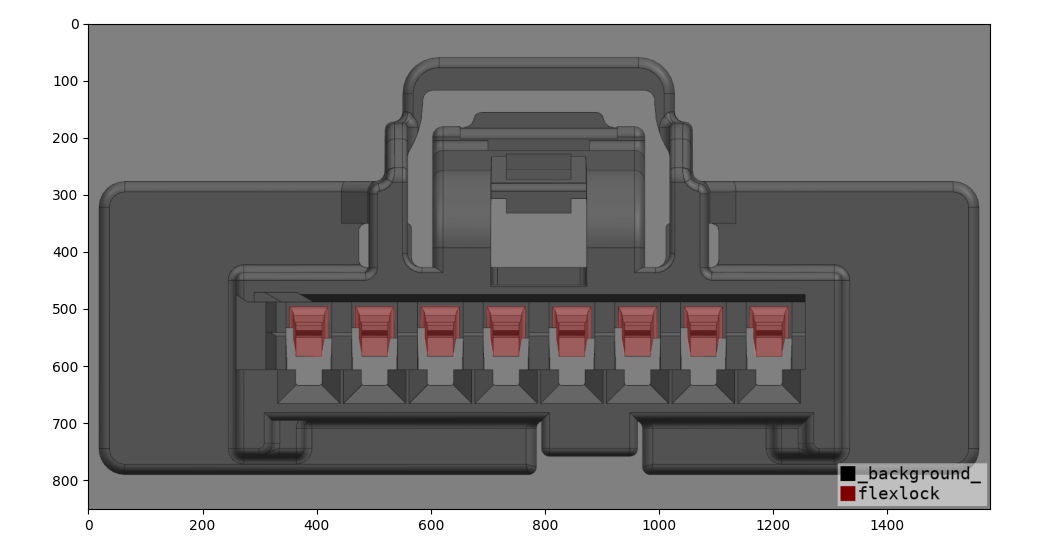

In [21]:
display(imagen1, imagen2)

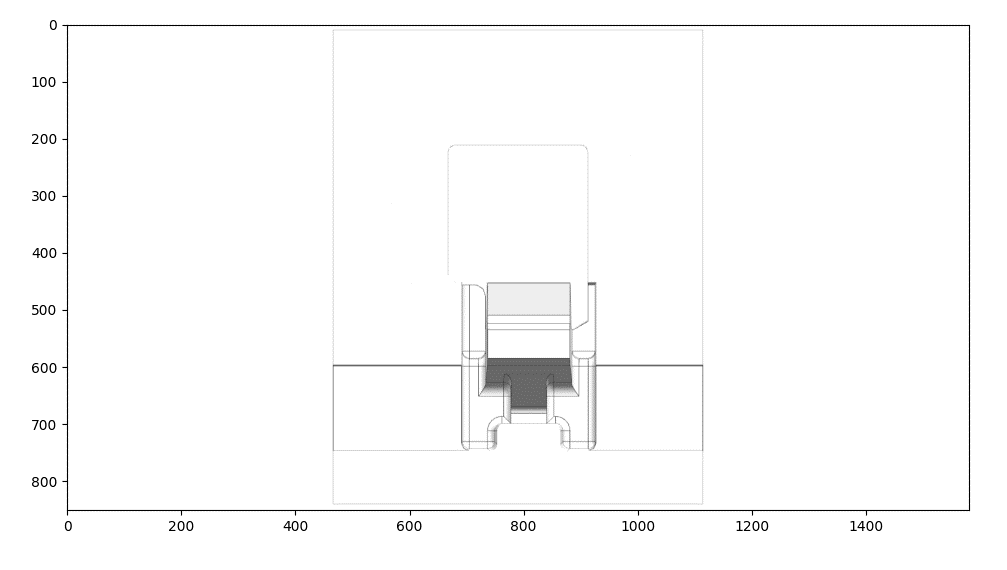

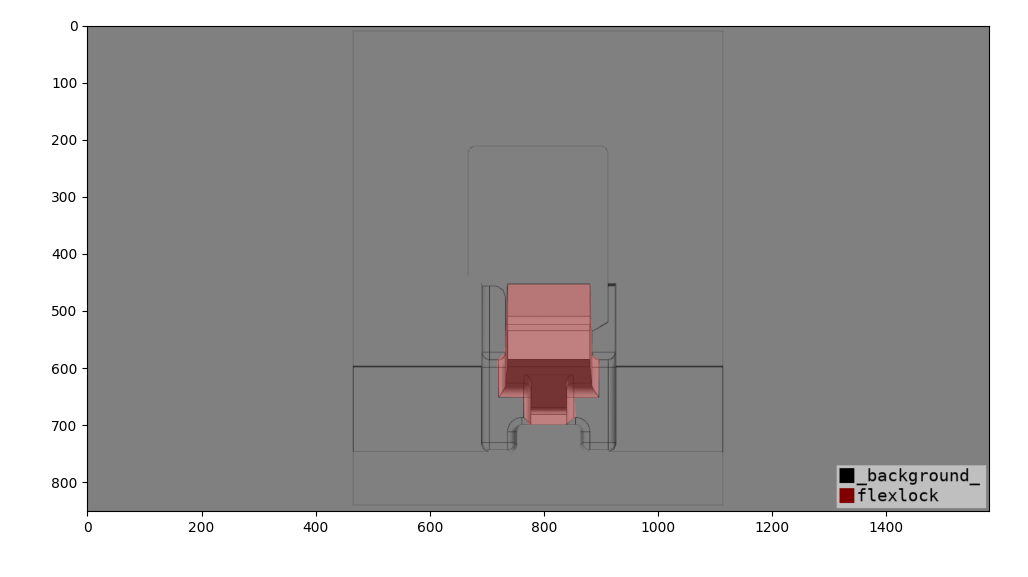

In [23]:
display(imagen3, imagen4)

Despues de esto tenemos que localizar el archivo de las imagenes , y correr el siguiente script que convertira los archivos generados en label a formato yolo

`labelme2yolo --json_dir test`

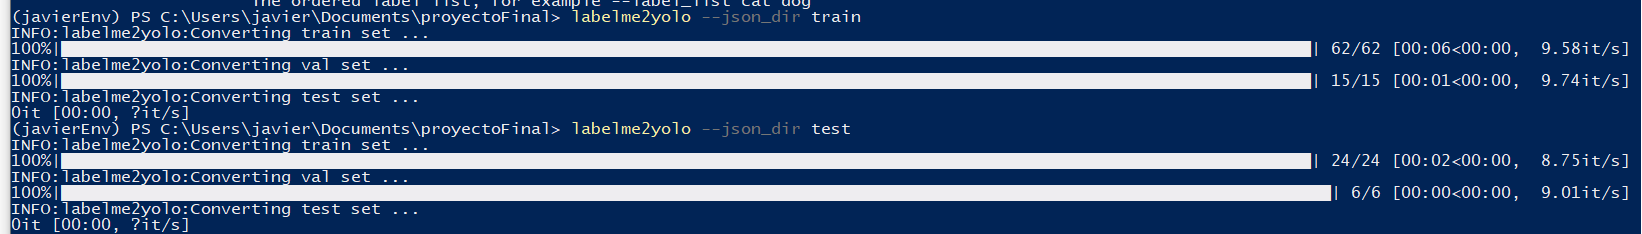

Los archivos resultates se guadan en una carpeta que contiene las imagenes y las etiquetas en archivo .txt.

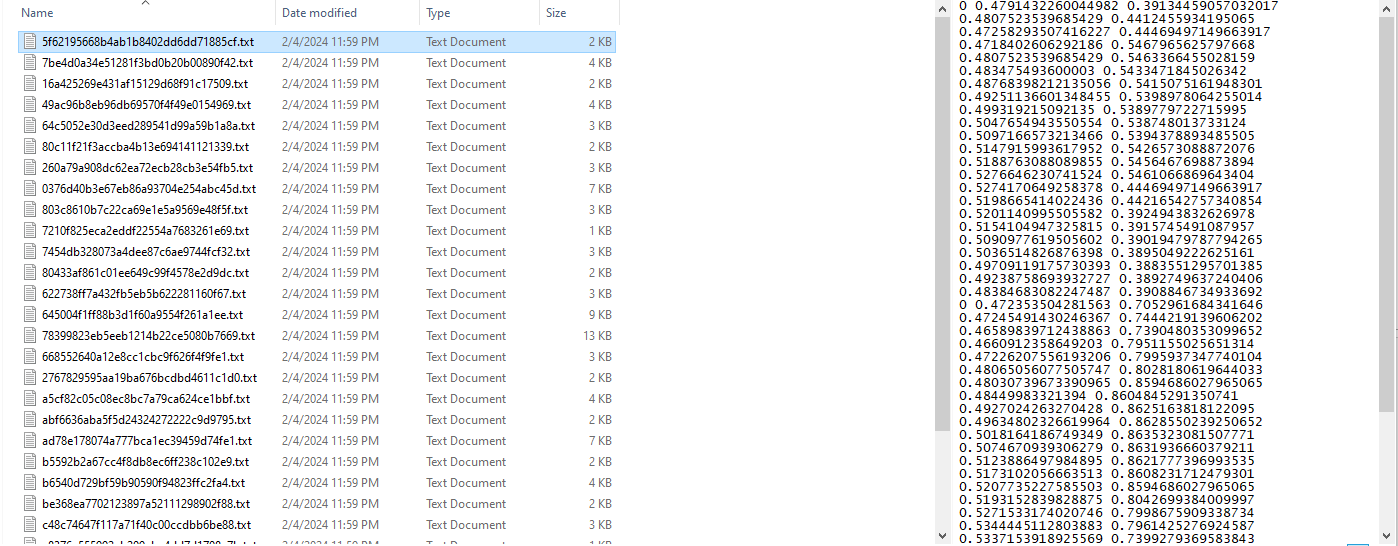

el archivo .txt contiene cada uno de los puntos de la plilinea que creamos sobre la imagen,expresados en puntos X,Y.

Con esto queda listo el pre-proceso de la identificacion de objetos que se usaran para entrenar el modelo YOLOv8

# Avance 3

Procedimos a hacer el entrenamiento de YOLO una vez que se crearon las carpetas Train y test con imagenes y archivos txt.
se dividio aproximadamente 80-20.

Se uso el siguiente comando para entrenar el modelo.

`yolo task=segment mode=train epochs=8 data=dataset.yaml model=yolov8m-seg.pt imgsz=851 batch=8`

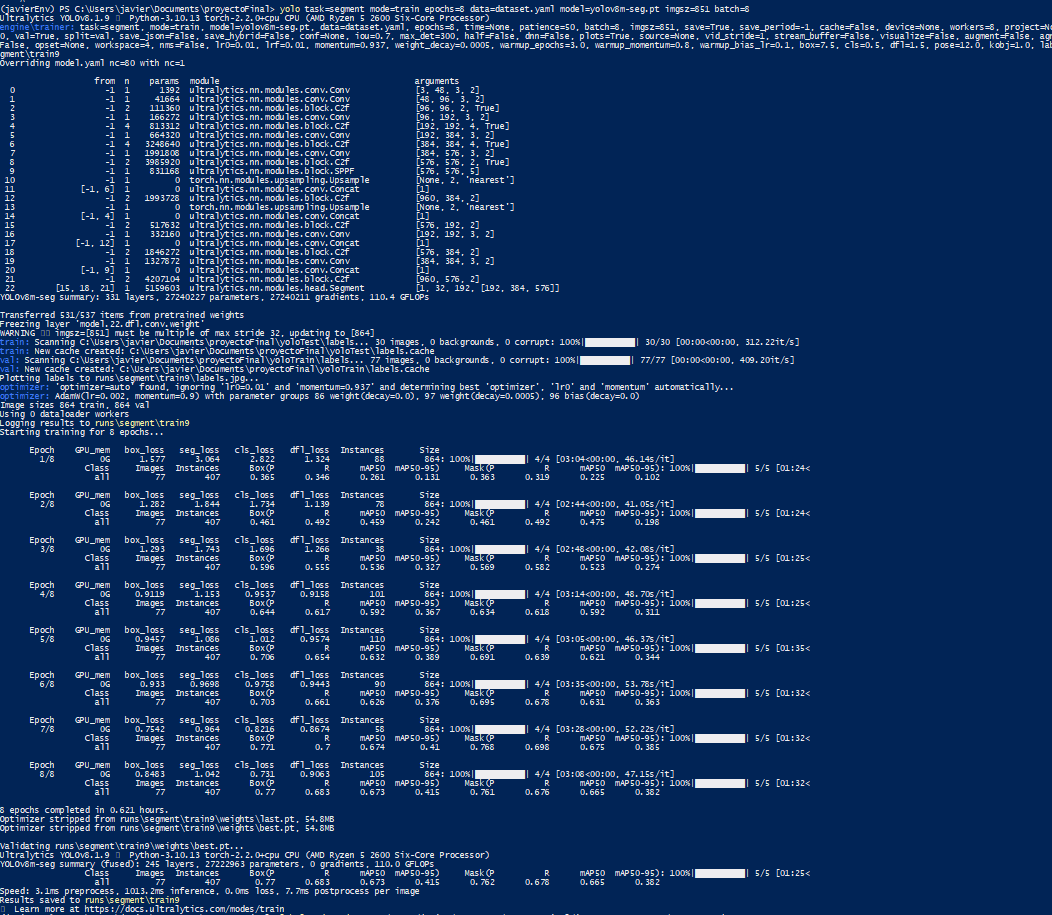



esto creo una folder en la direccion de origen llamado runs. la cual contiene el modelo entrenado final "last.pt" y algunas de las siguientes metricas:

- BoxF1 curve
- BoxP curve
- BoxPR curve
- BoxR curve
- Confusion matrix

este es el resultado de la validacion

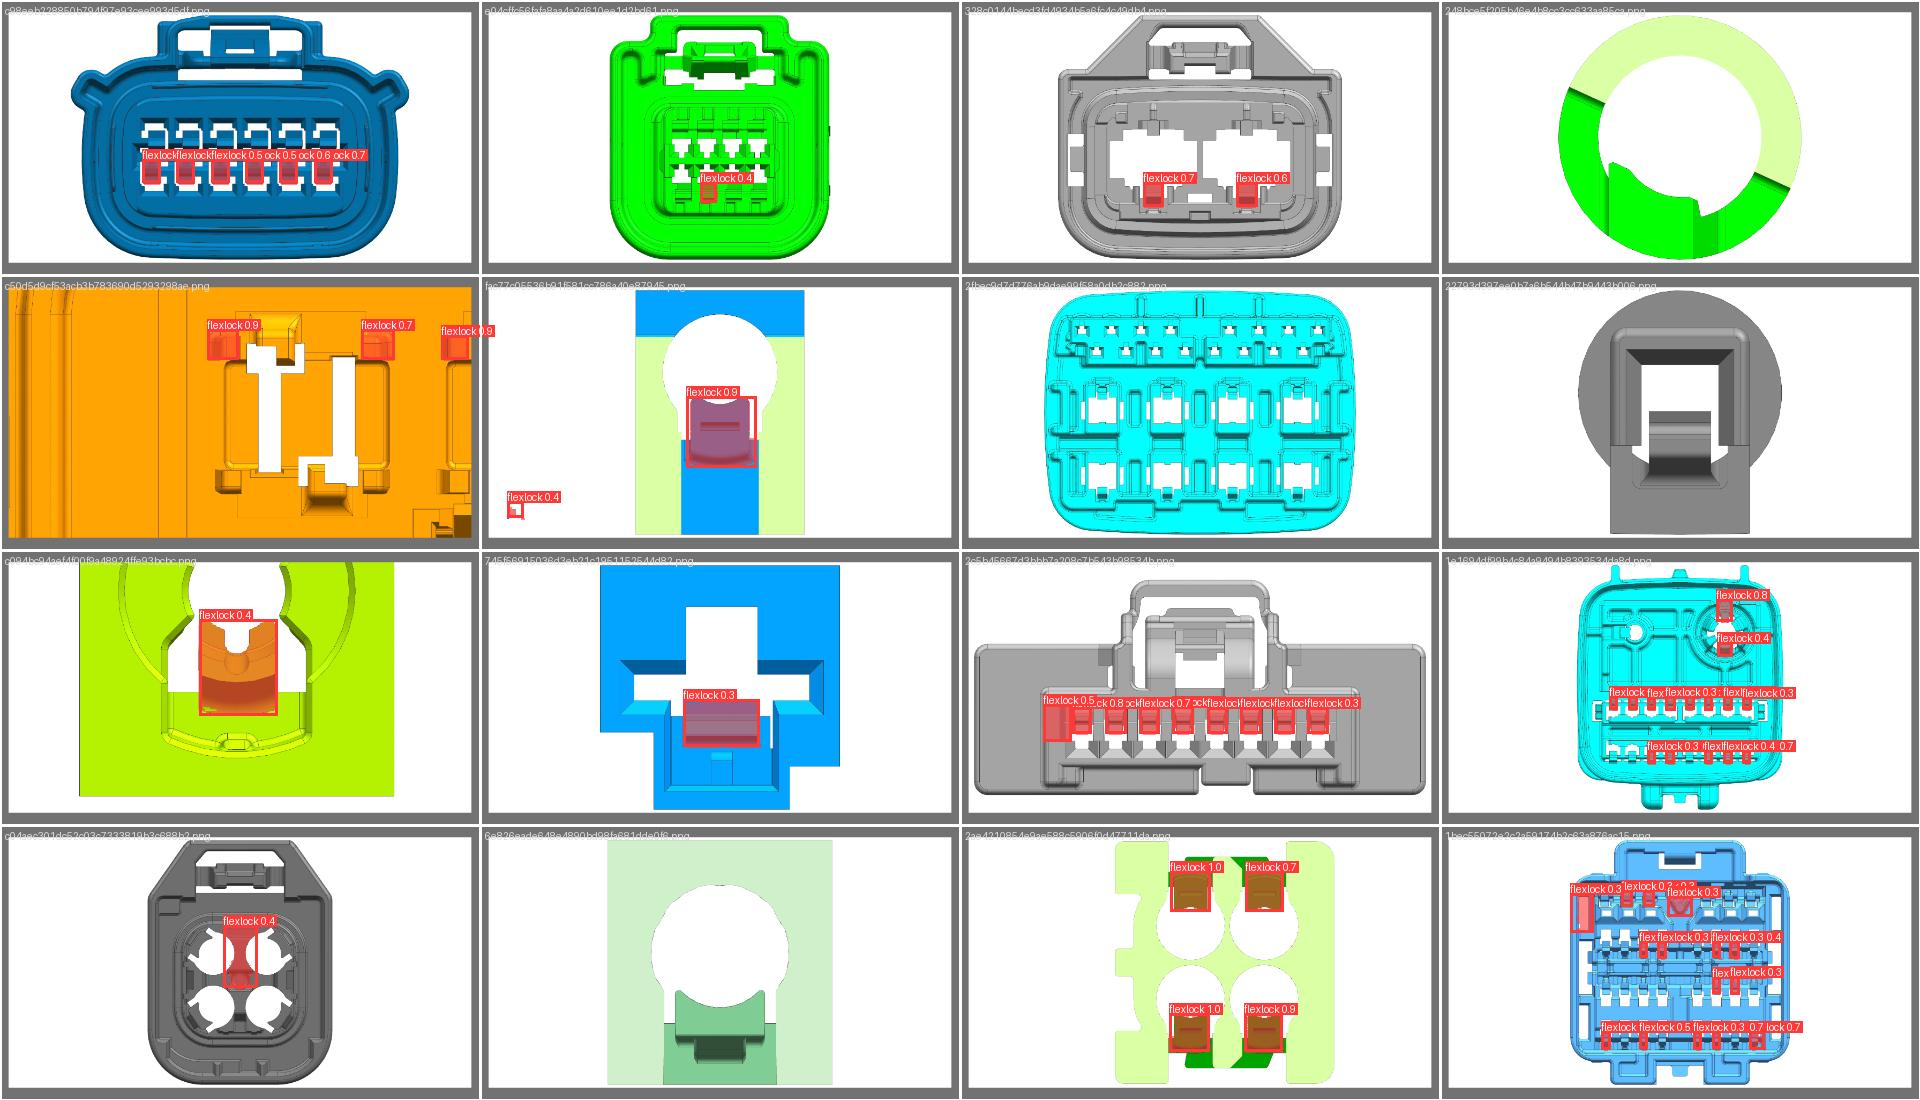


## Confidence score

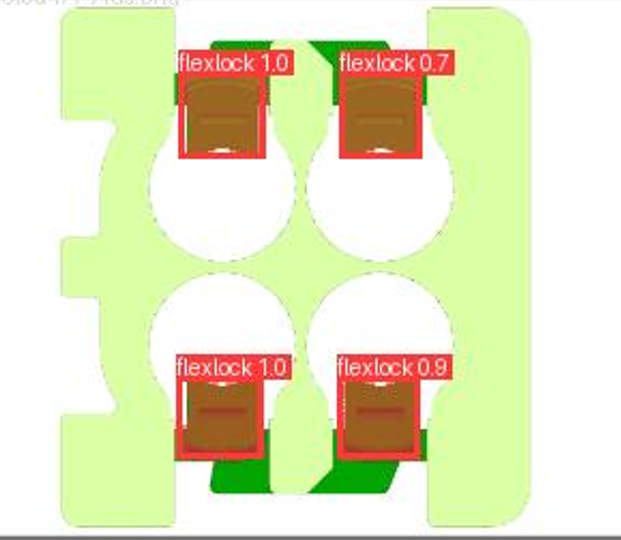

En la siguiente imagen se puede observar el resultado de la validacion, el valor que se muestra es el confidence score el cual se calcula de la siguiente forma:

**<div align="center">Cs = Pr(object) * IoU</div>**

**Intersection Over Union (IoU):**

IoU se utiliza para evaluar el algoritmo de detección de objetos. Es la superposición entre la verdad fundamental y el cuadro delimitador predicho, es decir, calcula qué tan similar es el cuadro predicho con respecto a la verdad fundamental.

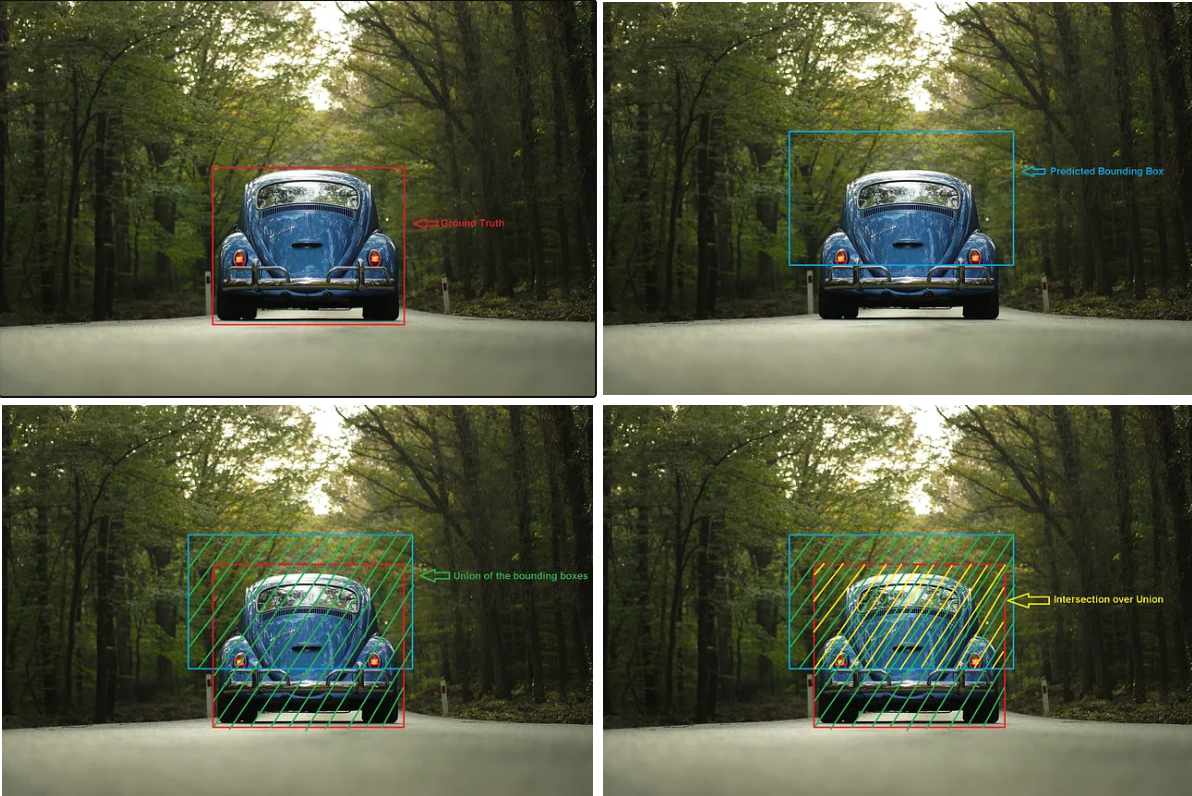

**Pr(object)**


El algoritmo puede encontrar múltiples detecciones del mismo objeto. La Non-max suppression es una técnica mediante la cual el algoritmo detecta el objeto solo una vez. Considera un ejemplo donde el algoritmo detectó tres cuadros delimitadores para el mismo objeto. Los cuadros con sus respectivas probabilidades se muestran en la imagen a continuación.

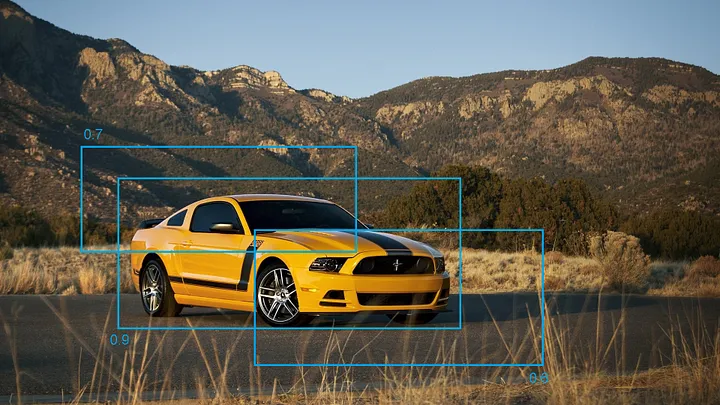


Las probabilidades de los cuadros son 0.7, 0.9 y 0.6, respectivamente. Para eliminar los duplicados, primero vamos a seleccionar el cuadro con la mayor probabilidad y lo presentaremos como una predicción. Luego, eliminaremos cualquier cuadro delimitador con un IoU > 0.5 (o cualquier valor umbral) con la salida predicha. El resultado será:

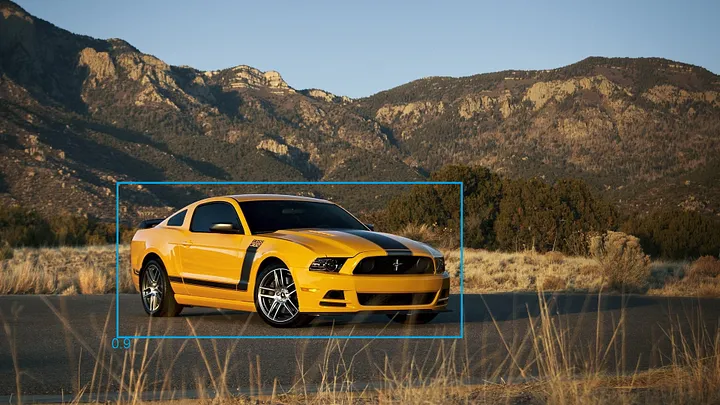




## Métricas de rendimiento 

**Matriz de Confusion**

Por lo general, el umbral de conidencia se mantiene superior a 0,5.

- Verdadero Positivo (True Positive, TP): Se produce cuando se ha detectado el
objeto y IOU>=Umbral. Es una detección correcta.
<br> <br>
- Falso Positivo (False Positive, FP): Se produce cuando el sistema informático
detecta el objeto, pero al calcular el IOU se obtiene que IOU<Umbral. Se trata por
tanto de una detección incorrecta.
<br> <br>
- Falso negativo (False Negative, FN): Es cuando existe un groundbox en la imagen
pero no se detecta.
<br> <br>
- Verdadero Negativo (True Negative, TN): No se utiliza puesto que serían todos los
cuadros delimitadores posibles que no contienen y en los que no se detectan
objetos. En detección de objetos hay una infinidad de cuadros delimitadores
posibles que no se deben detectar en una imagen. 

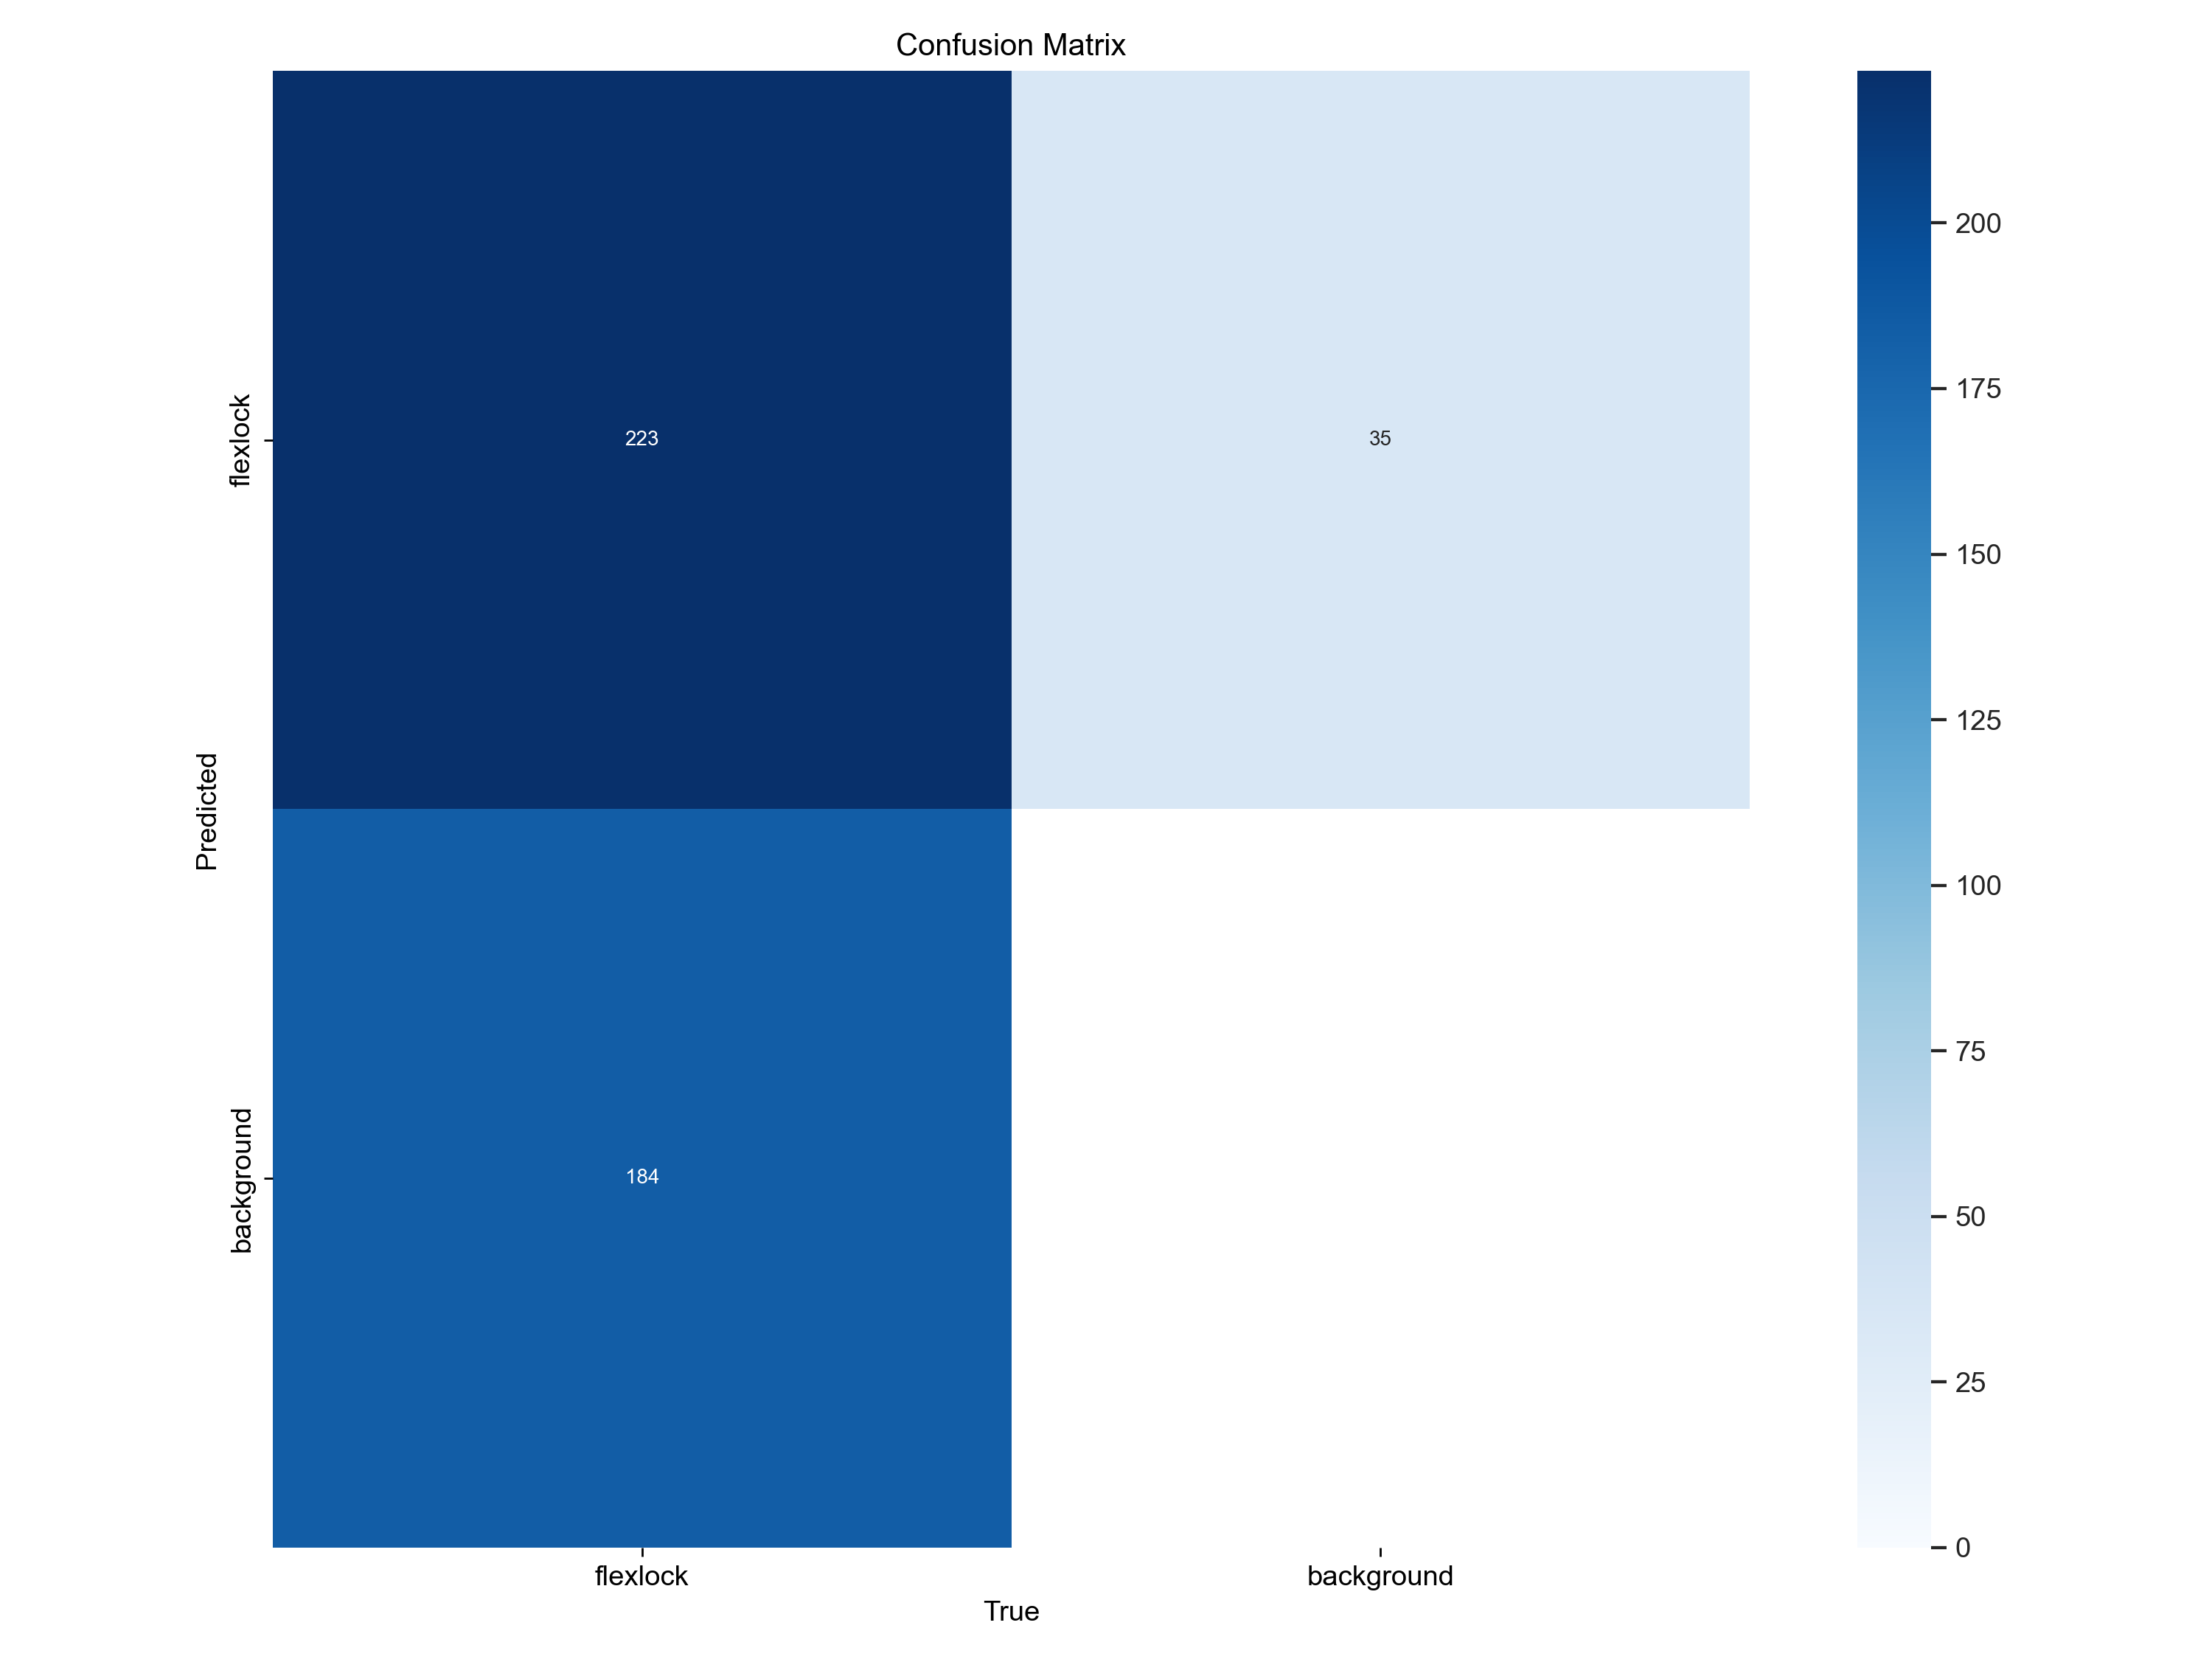

* umbral usado = 0.5

**Precision , Recall and F1** 

La precisión se establece como una medida fundamental que revela la exactitud de nuestro modelo dentro de una clase específica. Se calculó, como se muestra en la Ecuación (1), como la proporción de Verdaderos Positivos (TP) respecto a la suma de Verdaderos Positivos y Falsos Positivos (FP) para cada nivel del objetivo, es decir, fuego, no-fuego y humo.

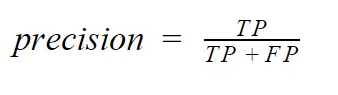

La precisión indica qué tan confiados podemos estar de que una región detectada, pronosticada para tener el nivel objetivo positivo , realmente tenga el nivel objetivo positivo. 

Recall, también conocida como sensibilidad o tasa de verdaderos positivos (TPR, por sus siglas en inglés), indica qué tan confiados podemos estar de que todas las regiones detectadas con el nivel objetivo positivo fueron encontradas. Se definió como la proporción de Verdaderos Positivos (TP) respecto a la suma de Verdaderos Positivos y Falsos Negativos (FN), como se muestra en la Ecuación (2).

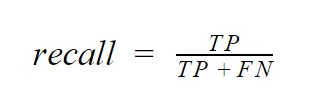

El puntaje F1 es especialmente útil para determinar la confianza óptima que equilibra los valores de precisión y recuperación para ese modelo dado.

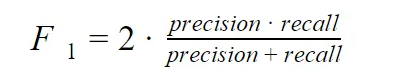

**Mean Average Precision (mAP)**

La Precisión Media Promedio (mAP) es una métrica crucial en la detección de objetos que evalúa el rendimiento del modelo considerando tanto la precisión como la recuperación a través de múltiples clases de objetos. Específicamente, mAP50 se enfoca en un umbral de IoU de 0.5, midiendo qué tan bien un modelo identifica objetos con un solapamiento razonable. Puntuaciones mAP50 más altas indican un rendimiento general superior.

Para proporcionar una evaluación más completa, mAP50-95 extiende la evaluación a una gama de umbrales de IoU de 0.5 a 0.95. Esta métrica es especialmente valiosa para tareas que requieren una localización precisa y detección de objetos de gran detalle.

En la práctica, mAP50 y mAP50-95 ayudan a evaluar el rendimiento del modelo a través de diferentes clases y condiciones, ofreciendo perspectivas sobre la precisión de la detección de objetos mientras se considera el compromiso entre precisión y recuperación. Los modelos con puntuaciones mAP50 y mAP50-95 más altas son más confiables y adecuados para aplicaciones exigentes como la conducción autónoma y la vigilancia de seguridad.

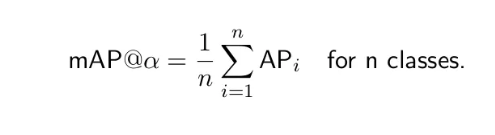

https://www.linkedin.com/pulse/yolov8-projects-1-metrics-loss-functions-data-formats-akbarnezhad/

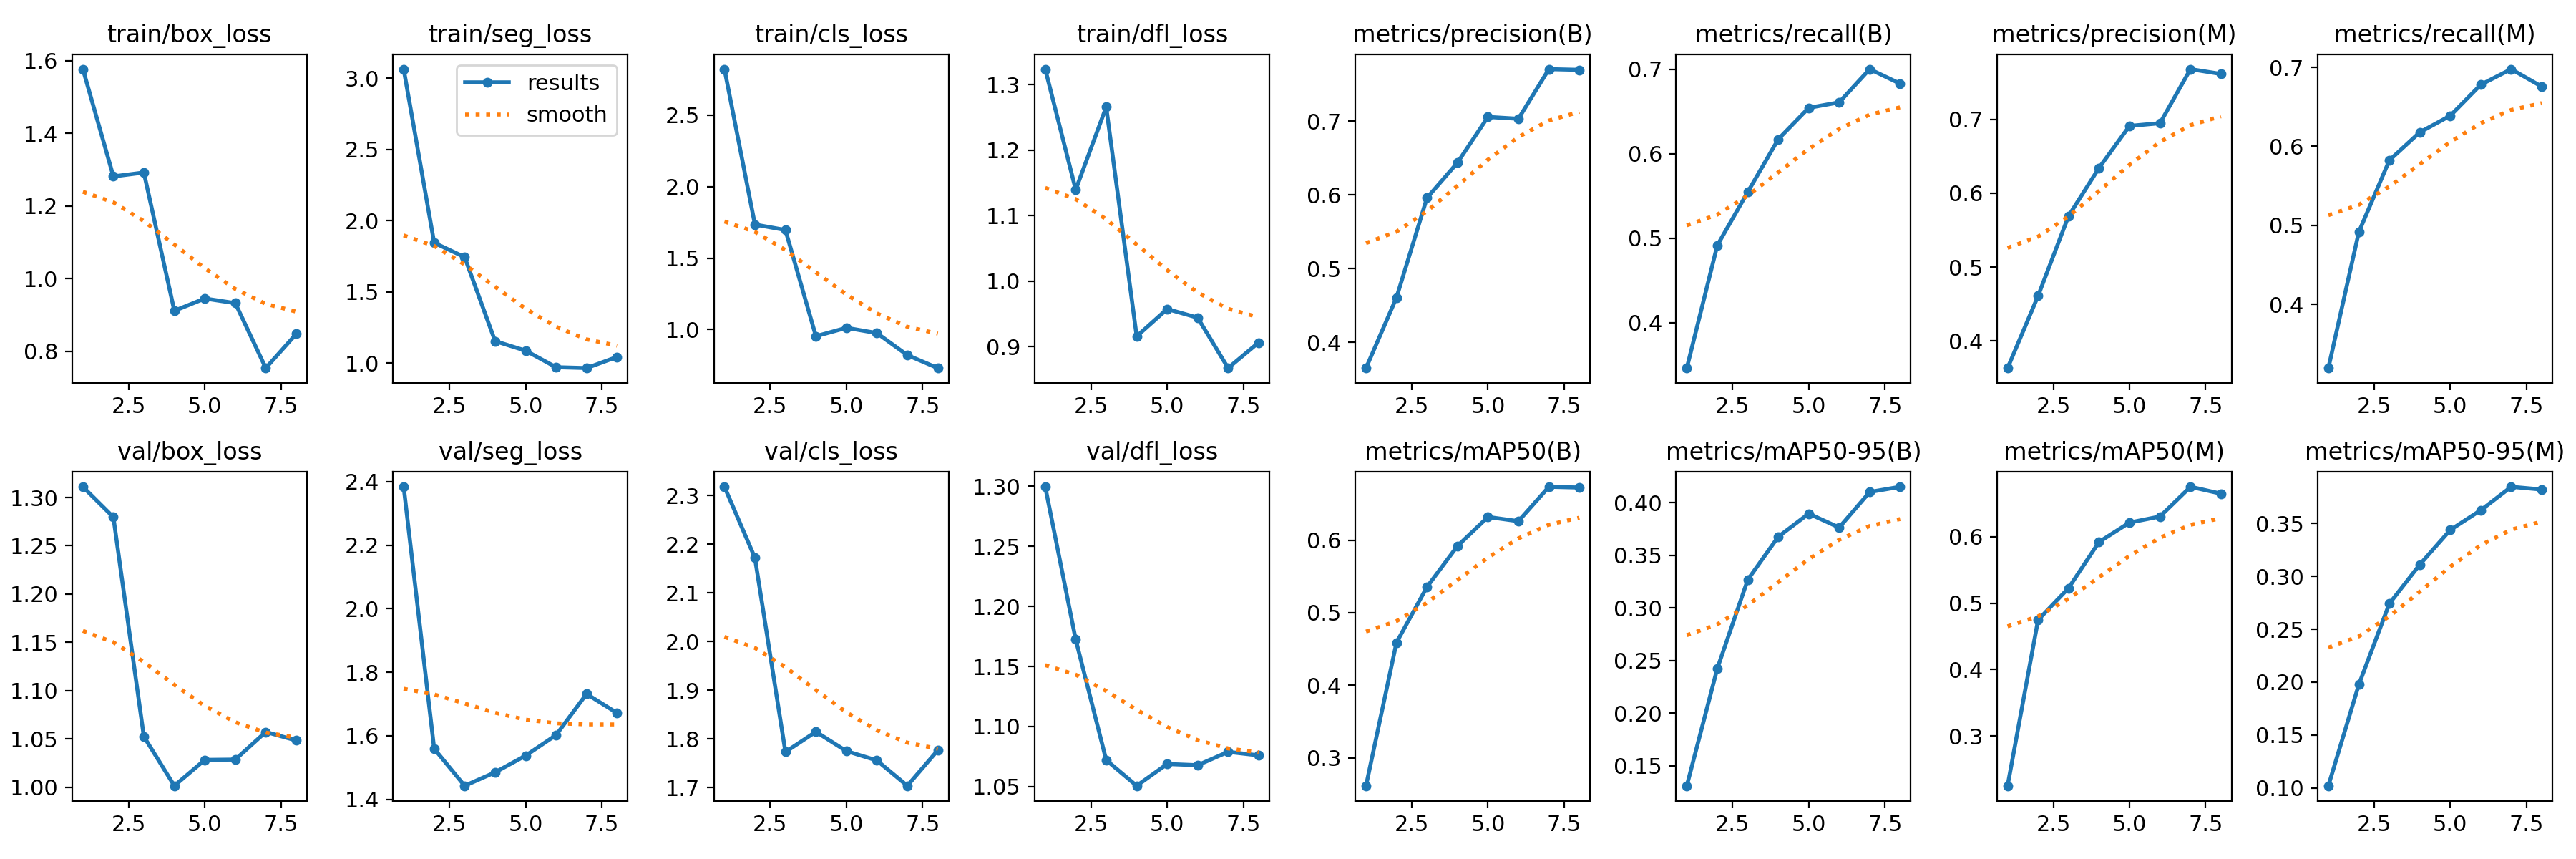



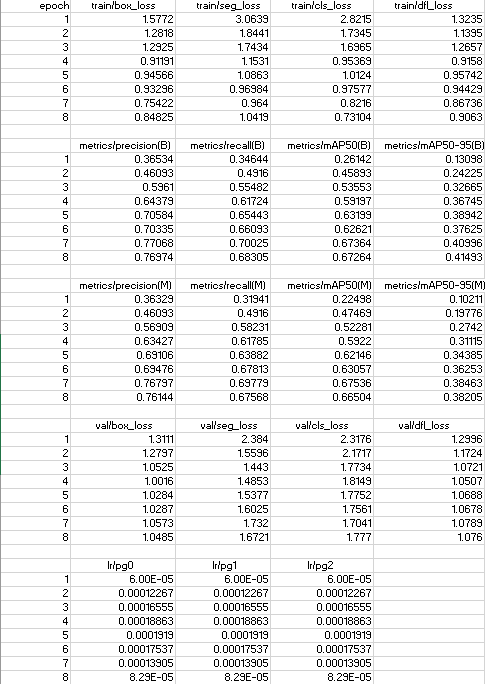

## Resultados visules, Curvas

Curva de Puntuación F1 (F1_curve.png): Esta curva representa la puntuación F1 a través de varios umbrales. Interpretar esta curva puede ofrecer perspectivas sobre el equilibrio del modelo entre falsos positivos y falsos negativos sobre diferentes umbrales.

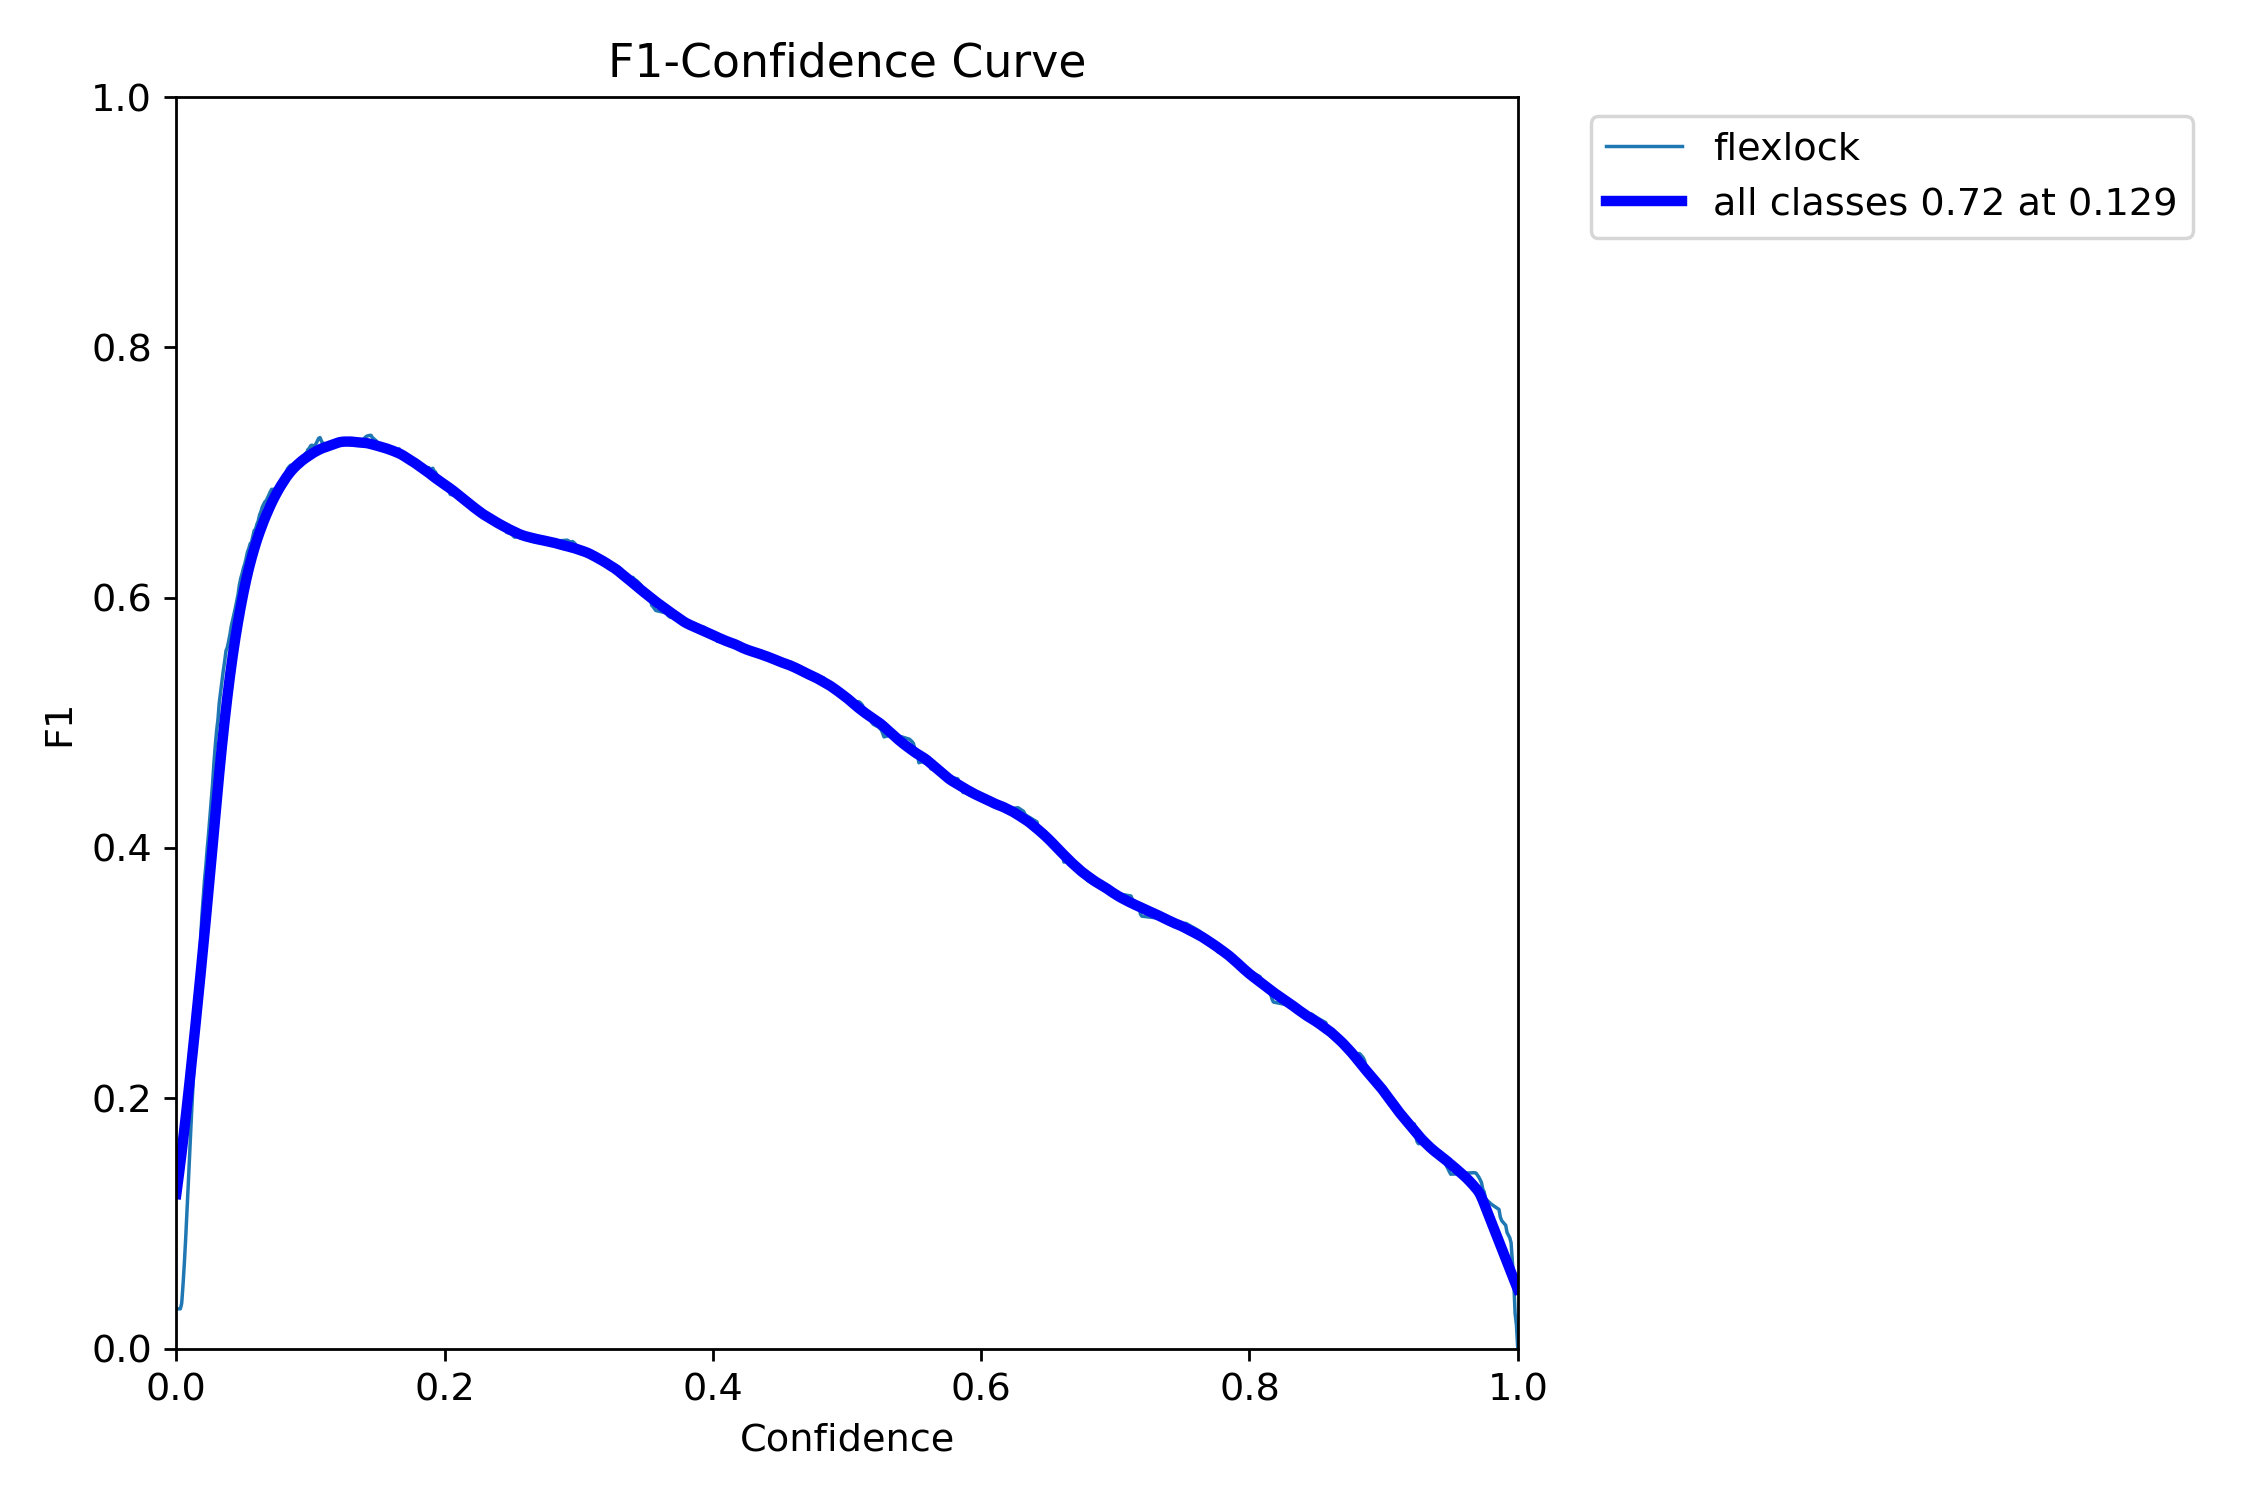




Curva Precisión-Recuperación (PR_curve.png): Una visualización integral para cualquier problema de clasificación, esta curva muestra los compromisos entre precisión y recuperación en umbrales variados. Se vuelve especialmente significativa cuando se trata con clases desequilibradas.

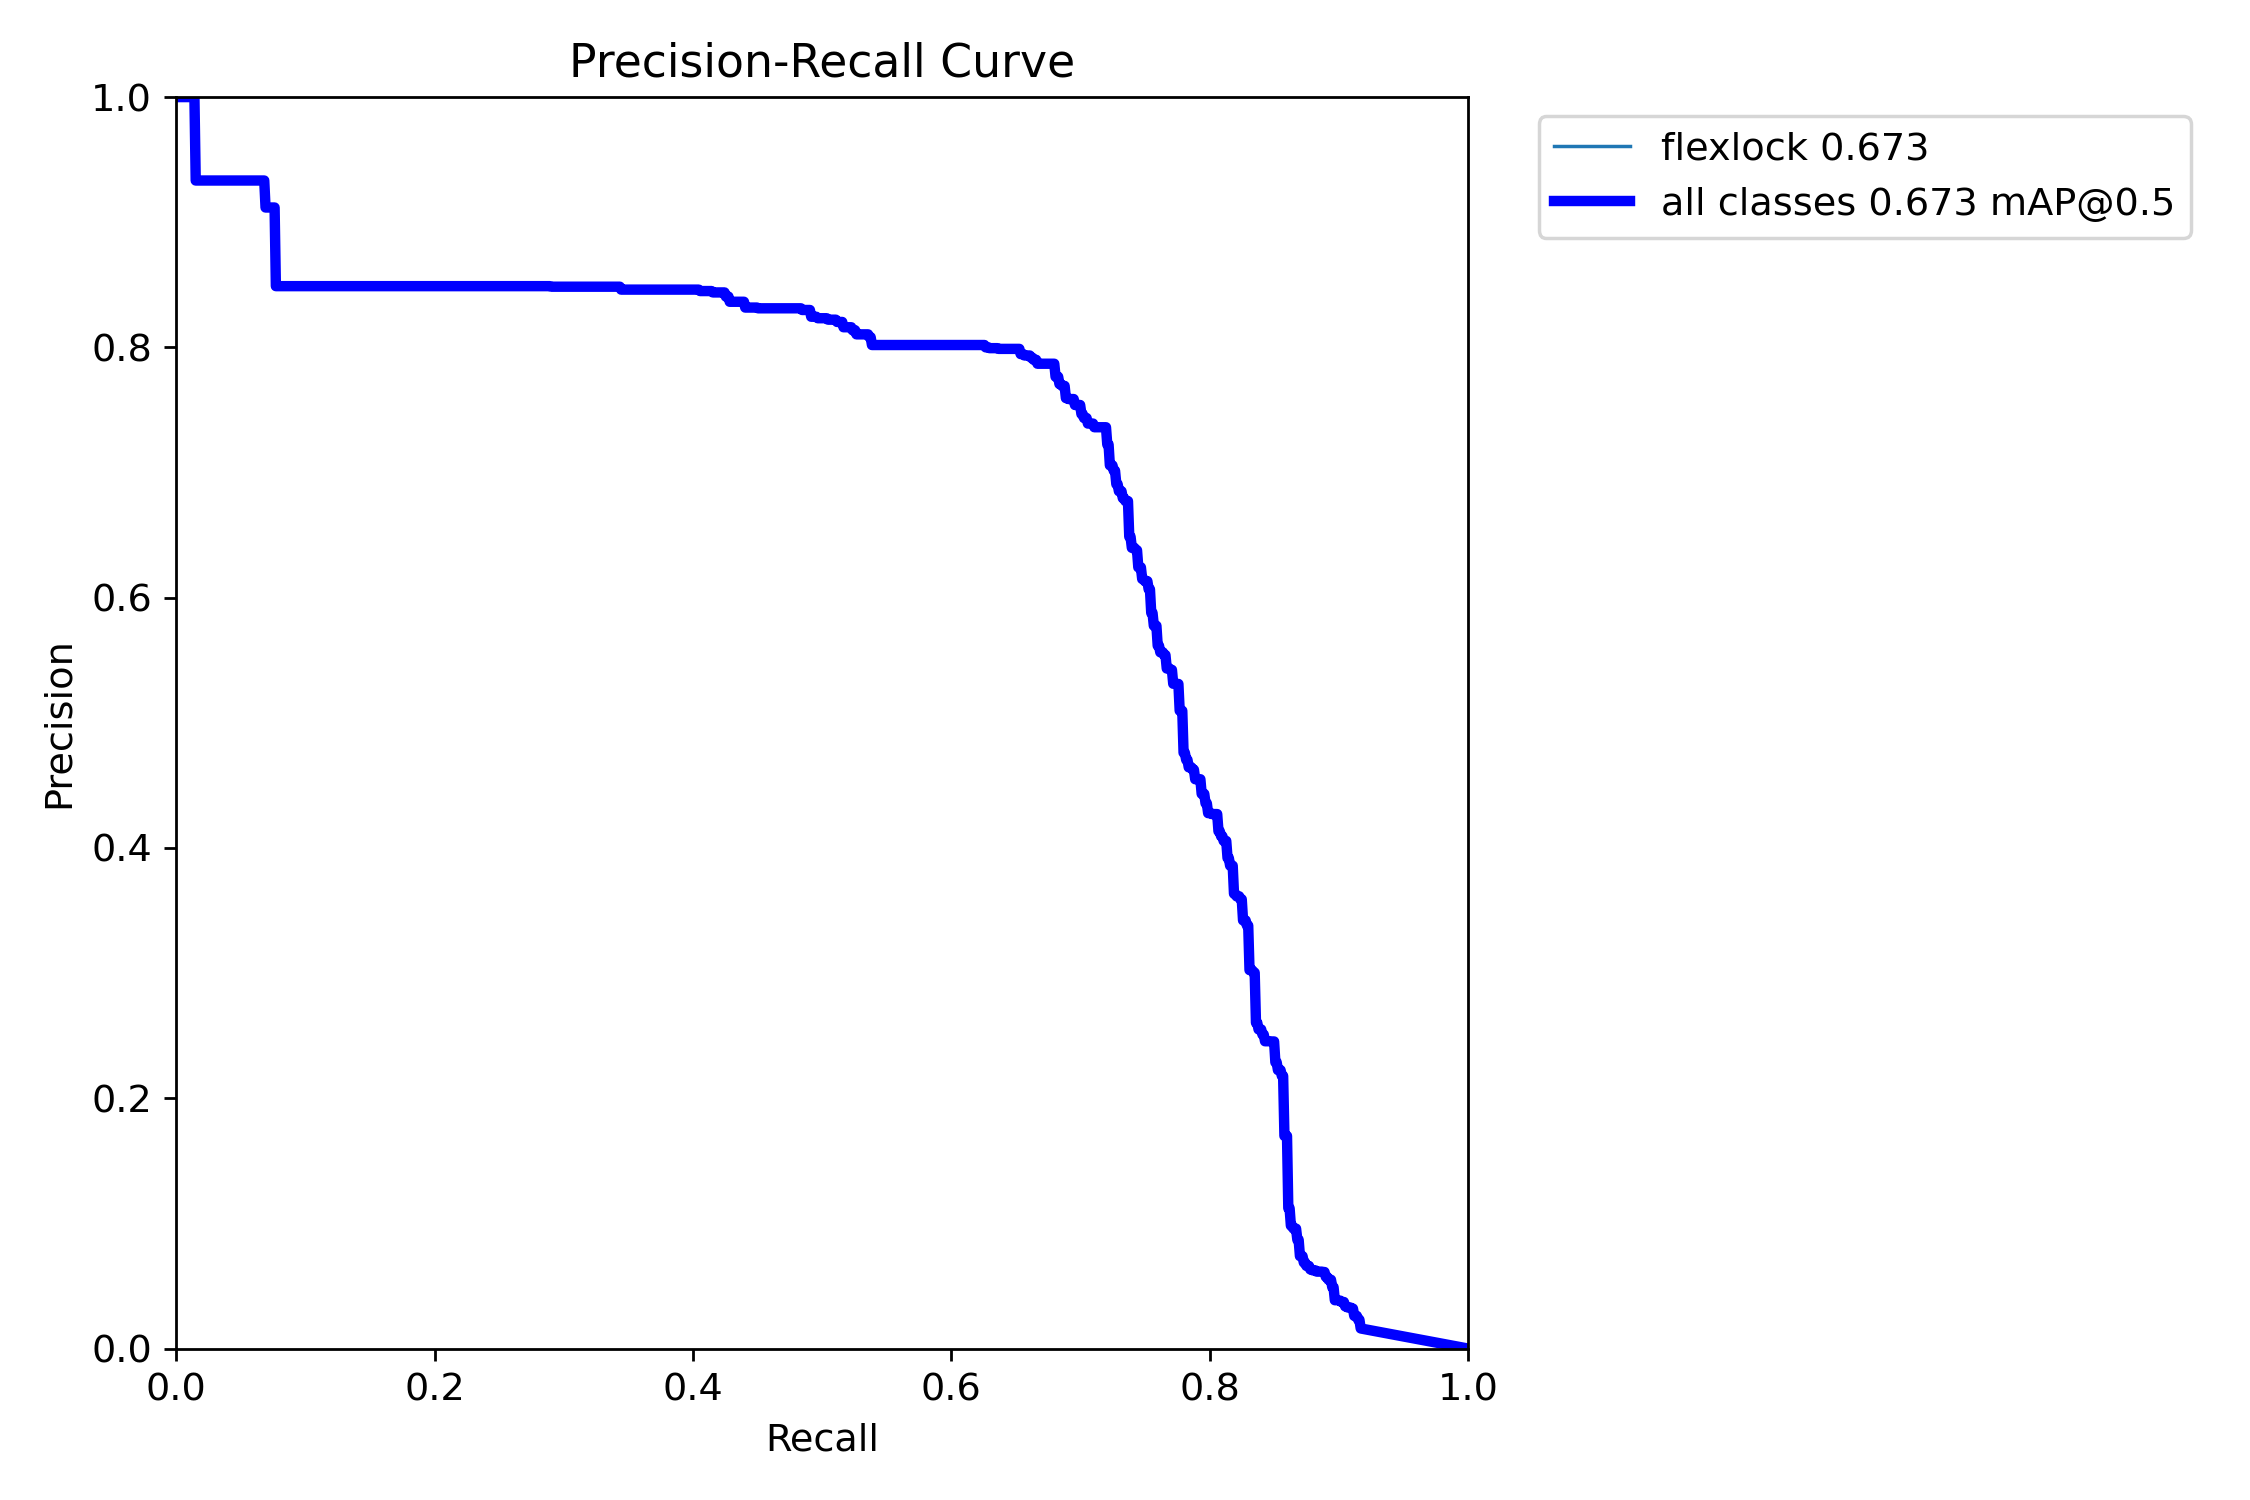


Curva de Precisión (P_curve.png): Una representación gráfica de los valores de precisión en diferentes umbrales. Esta curva ayuda a entender cómo varía la precisión a medida que cambia el umbral.

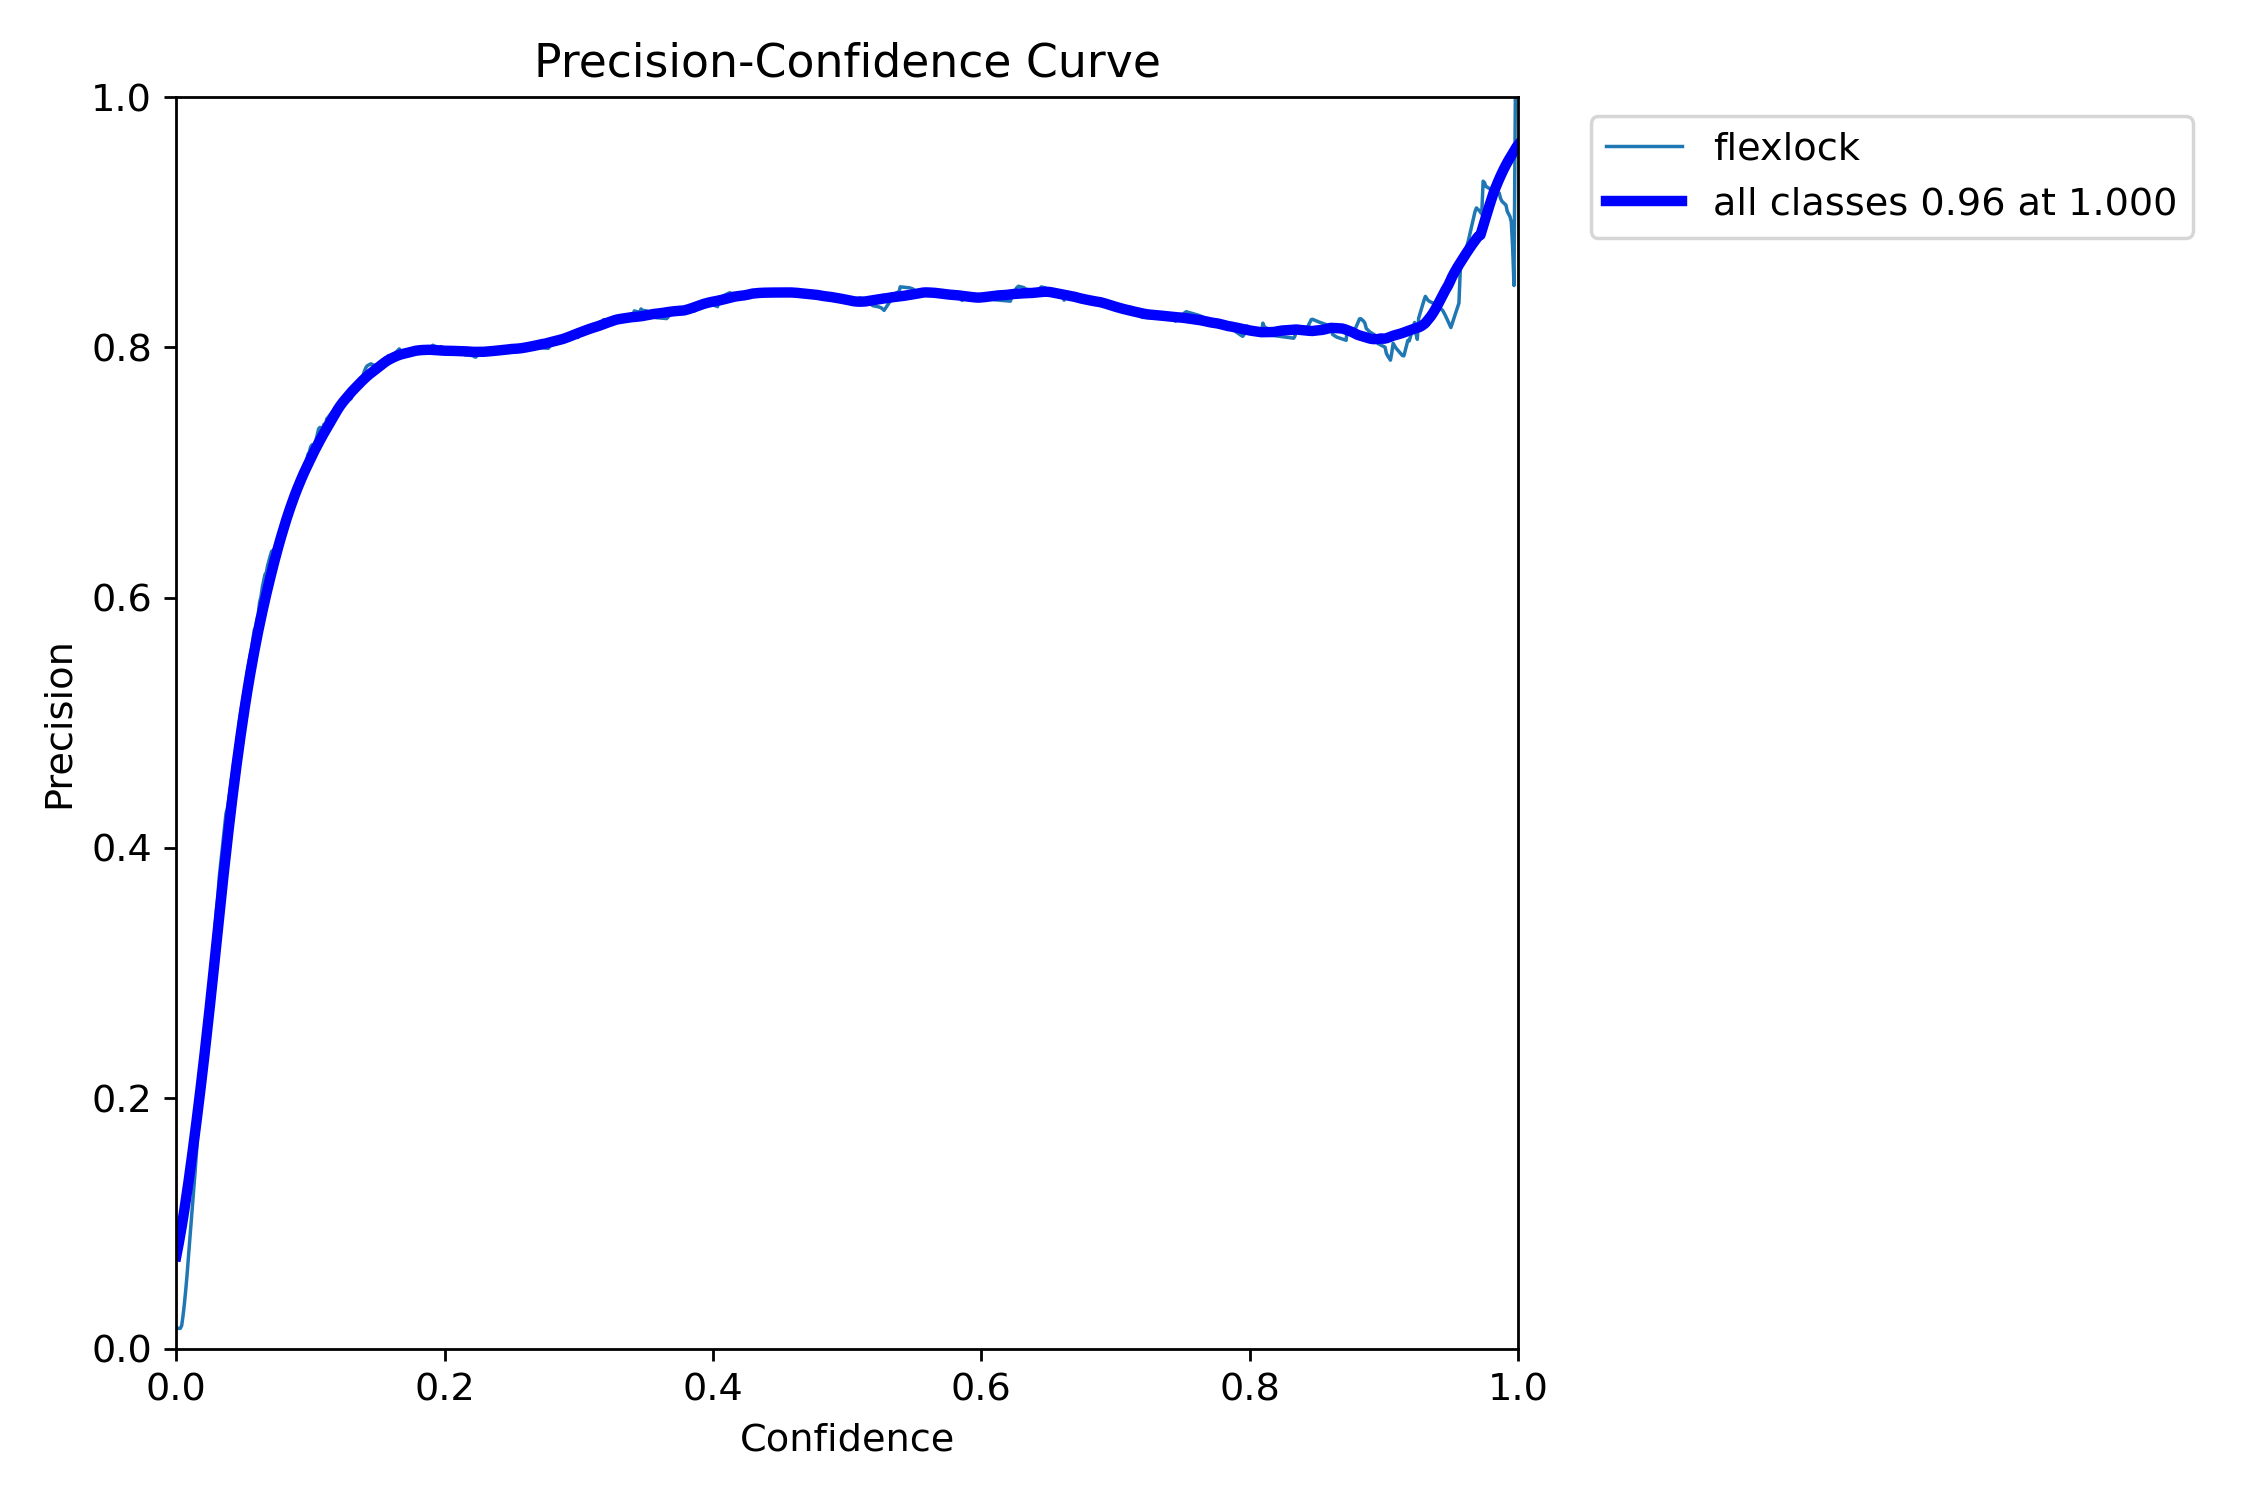


Curva de Recuperación (R_curve.png): Correspondientemente, este gráfico ilustra cómo cambian los valores de recuperación a través de diferentes umbrales.
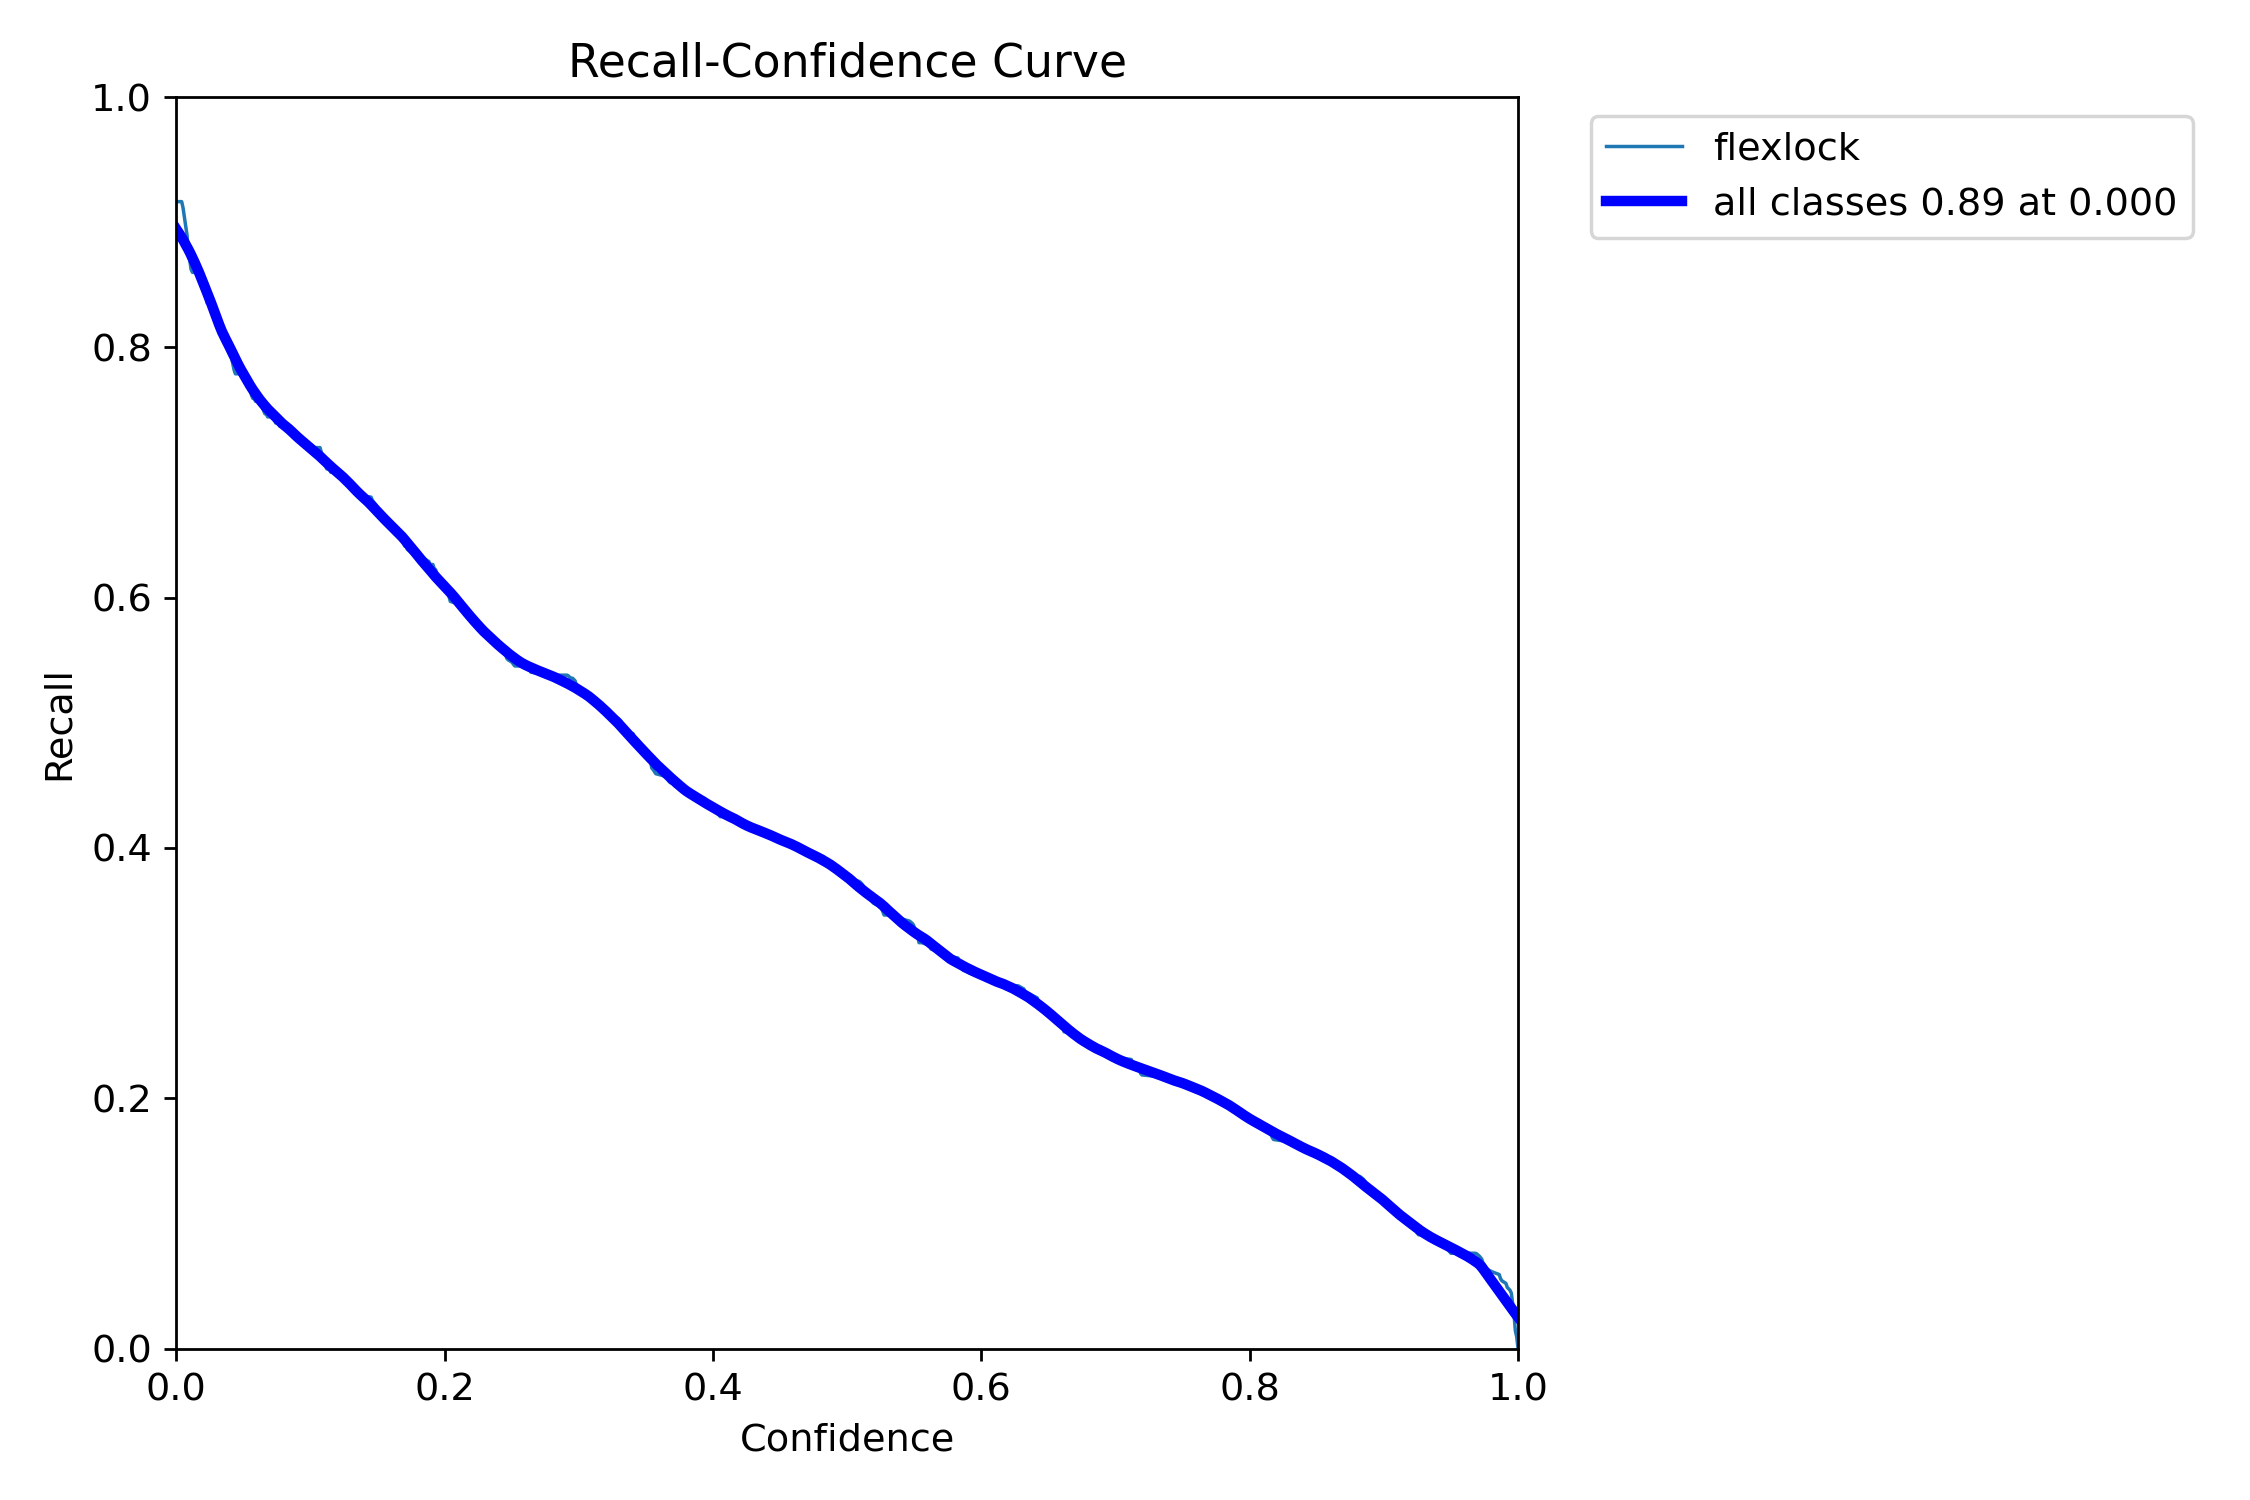



**Elegir las Métricas Adecuadas** <br>

La elección de las métricas adecuadas para evaluar a menudo depende de la aplicación específica.

mAP: Adecuado para una evaluación amplia del rendimiento del modelo.

IoU: Esencial cuando la ubicación precisa del objeto es crucial.

Precisión: Importante cuando es una prioridad minimizar las detecciones falsas.

Recall: Vital cuando es importante detectar cada instancia de un objeto.

Puntuación F1: Útil cuando se necesita un equilibrio entre precisión y recall.

Para aplicaciones en tiempo real, las métricas de velocidad como FPS (Cuadros Por Segundo) y latencia son cruciales para asegurar resultados oportunos.

reference: https://github.com/ultralytics/ultralytics/blob/main/docs/en/guides/yolo-performance-metrics.md

Segun la documentacion estudiada nos vamos a centrar en la metria mAP para comparar los diferentes modelos y escoger el mas optimo.

# Avance 4

Como modelo alternativo se probo un nuevo tipo de modelo pre-entrenado para deteccion. Se hicieron 2 pruebas con 100 y 200 epocas de entrenamiento estos fueron los resultados

**Modelo 1**

`yolo task=detect mode=train epochs=100 data=dataset.yaml model=yolov8n.pt imgsz=851 batch=20`

Epoca 100/100 mAP50: 75%

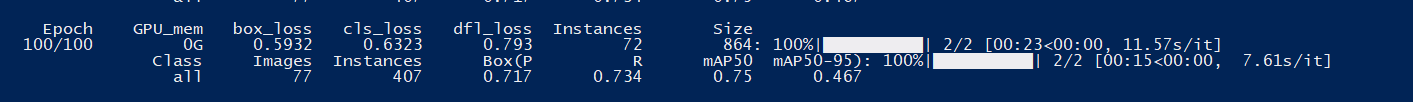

Resultado de validacion

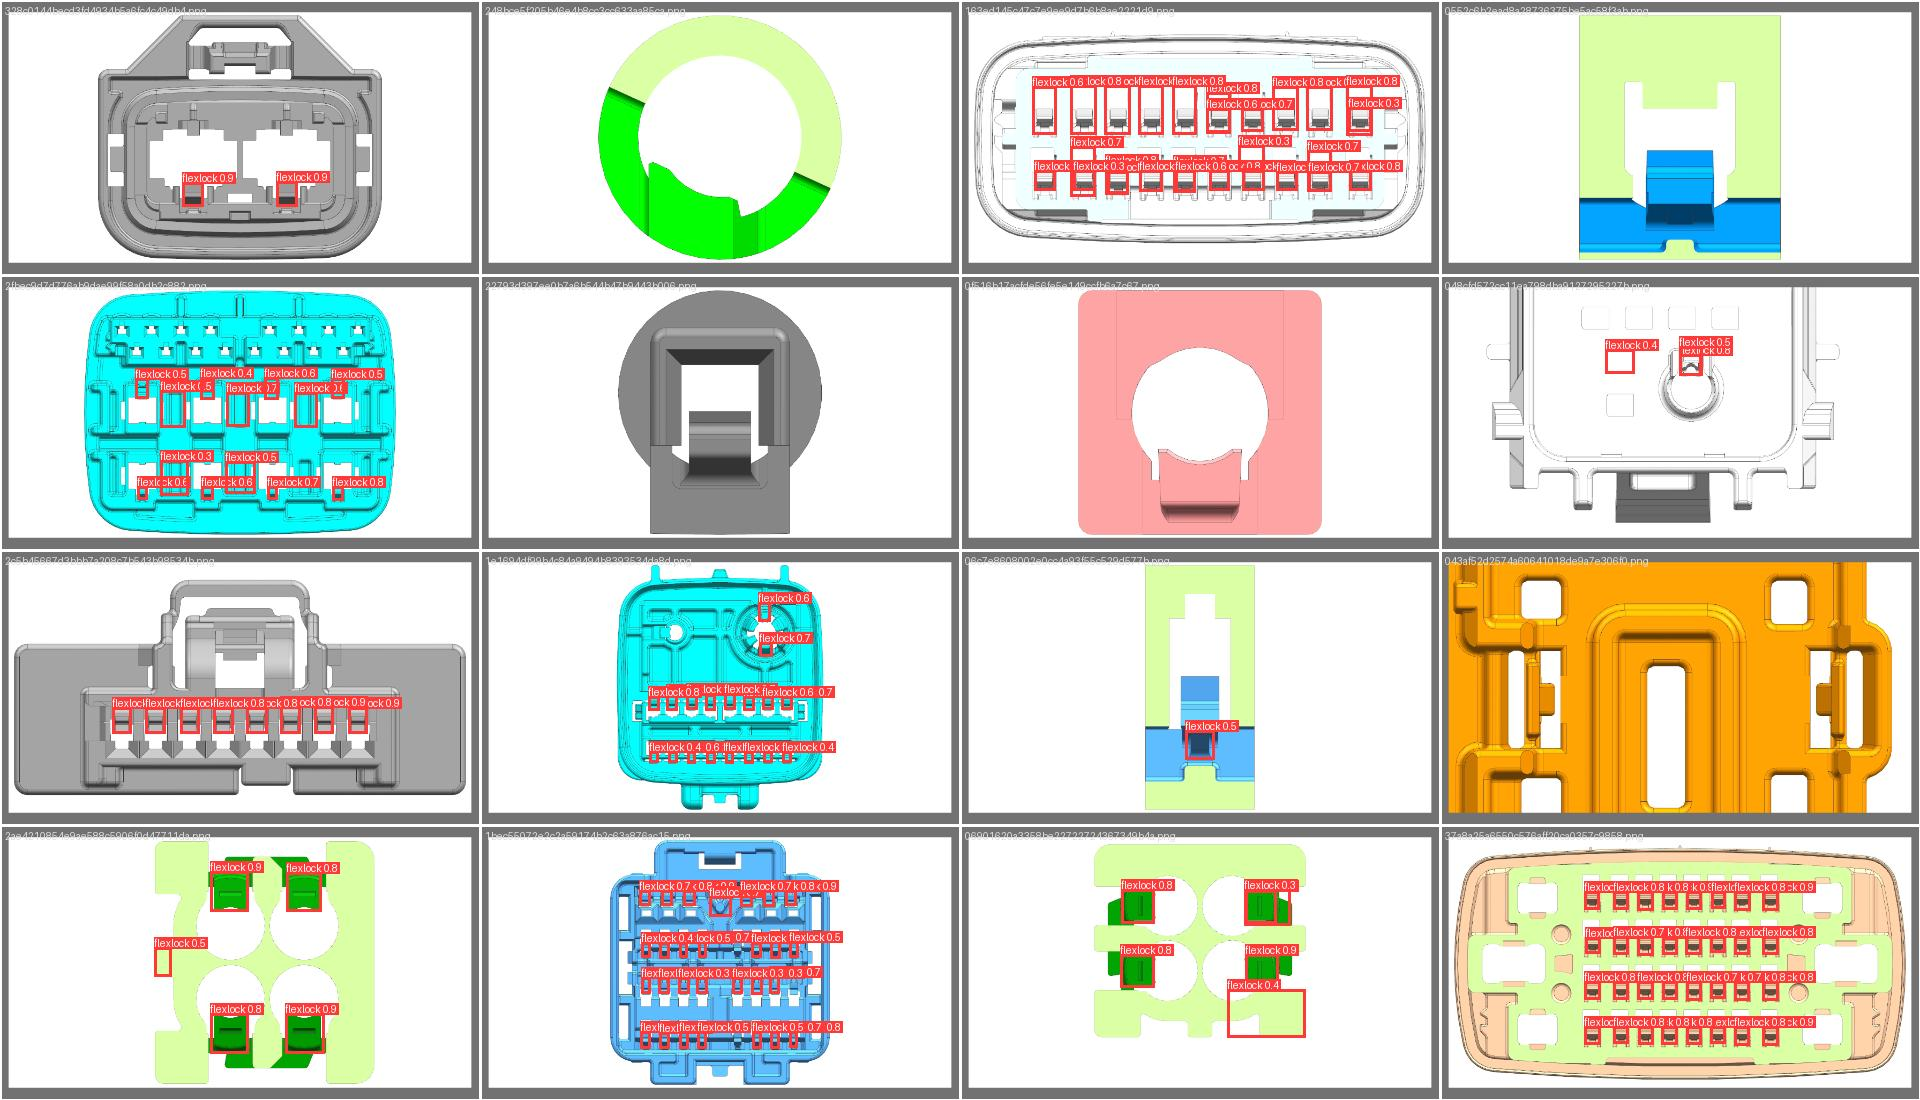

**Modelo 2**

`yolo task=detect mode=train epochs=200 data=dataset.yaml model=yolov8n.pt imgsz=851 batch=20`

Epoca 200/200 mAP50: 84.7%

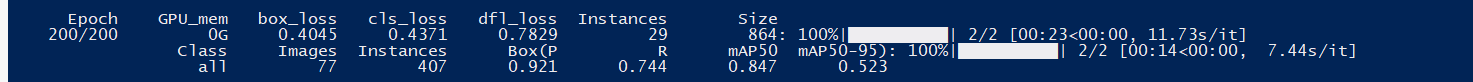

Resultado de validacion



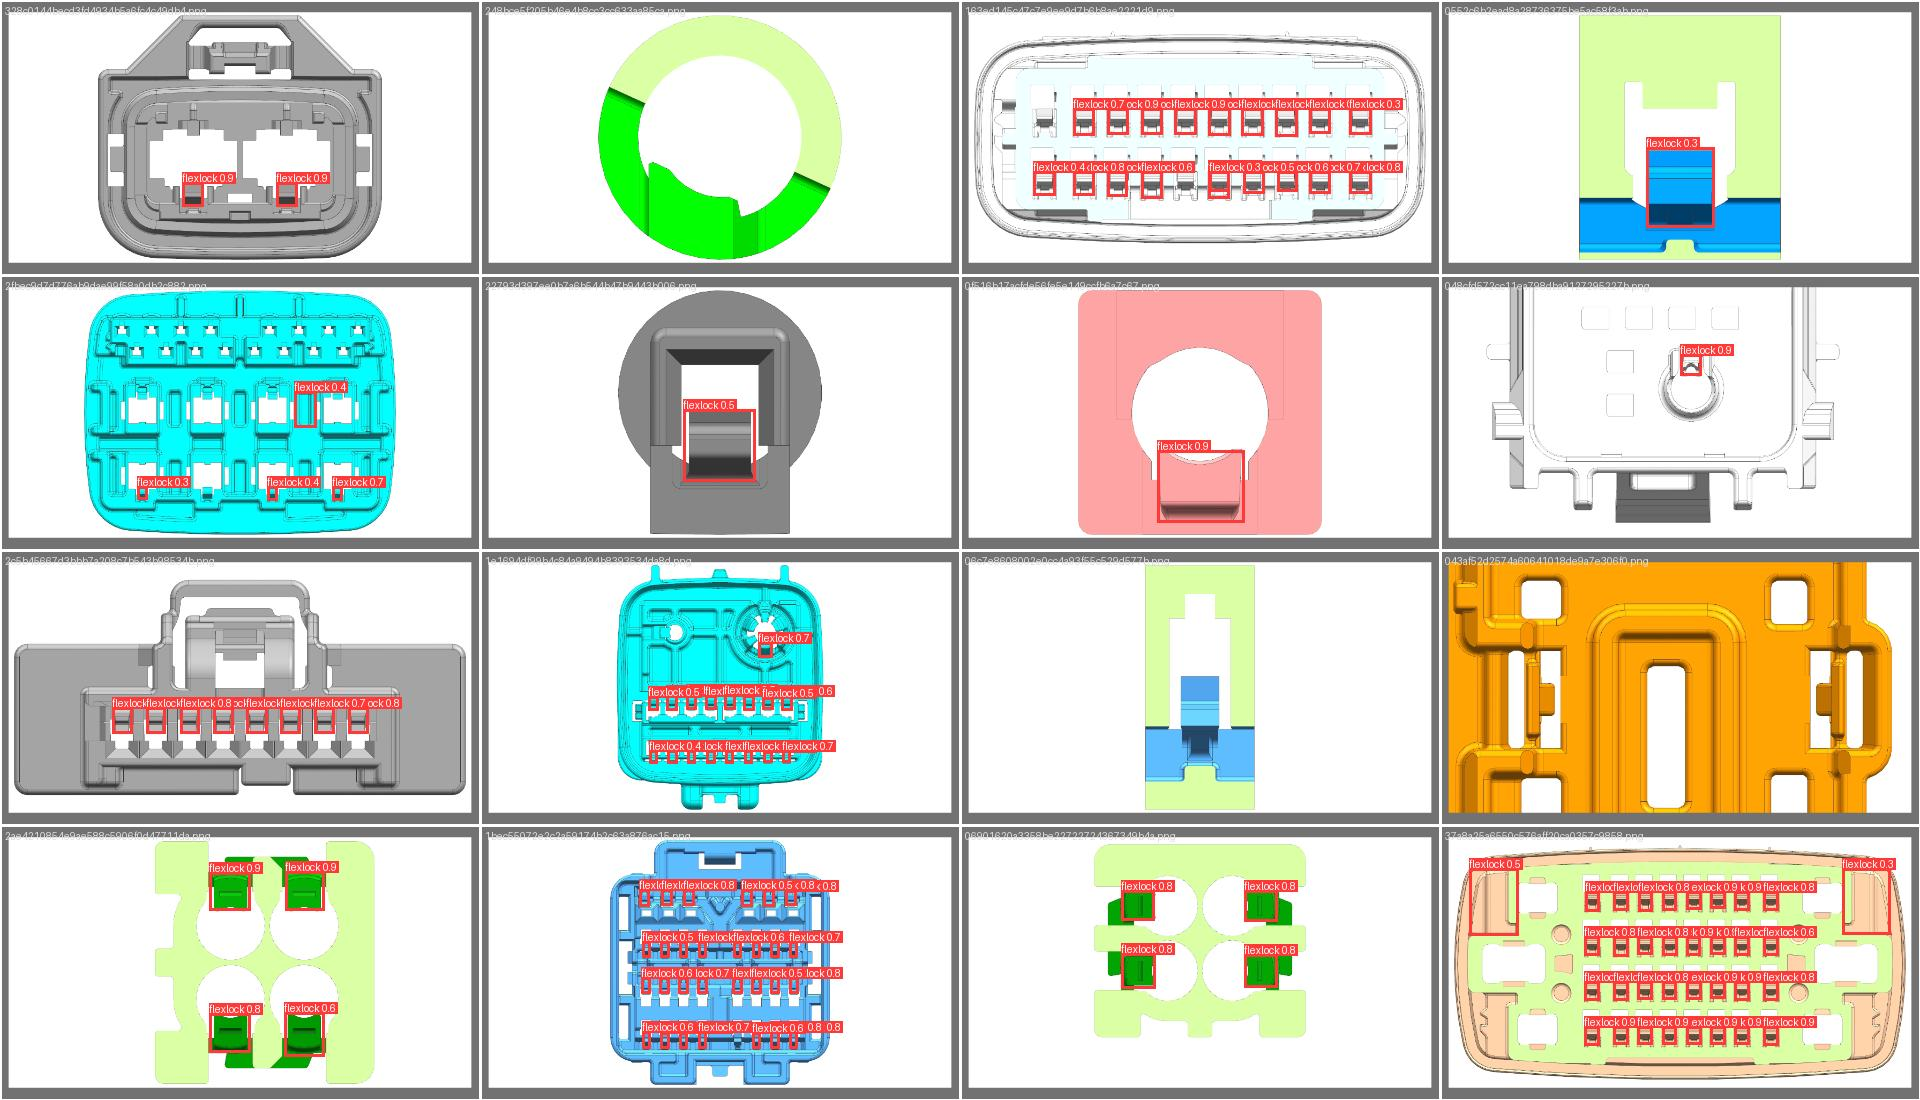